## Analytic description of WPIT.WaveProperties_mod routines with examples

In [1]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

#Define WPIT package location
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/..")
sys.path.append(fpath)

import WPIT.Environment_mod as env
import WPIT.WaveProperties_mod as wave


 <a class="anchor" id="top-bullet"></a>
### Table of Contents

* [WPIT.WaveProperties_mod.stix_parameters](#stix_parameters-bullet)
* [WPIT.WaveProperties_mod.refr_index](#ref_index-bullet)
* [WPIT.WaveProperties_mod.refr_index_appleton](#ref_index_appleton-bullet)
* [WPIT.WaveProperties_mod.dielectric_tensor_cold](#dielectric_tensor_cold-bullet)
* [WPIT.WaveProperties_mod.dielectric_tensor_warm](#dielectric_tensor_warm-bullet)
* [WPIT.WaveProperties_mod.refr_index_warm](#warm_refractive_index-bullet)
* [WPIT.WaveProperties_mod.stix_parameters_warm](#warm_stix_parameters-bullet)
* [WPIT.WaveProperties_mod.res_angle](#res_angle-bullet)
* [WPIT.WaveProperties_mod.gendrin_angle](#gendrin_angle-bullet)
* [WPIT.WaveProperties_mod.wave_amplitudes_bell](#wave_amplitudes_bell-bullet)
* [WPIT.WaveProperties_mod.wave_amplitudes_li](#wave_amplitudes_li-bullet)
* [WPIT.WaveProperties_mod.wave_amplitudes_jasna](#wave_amplitudes_jasna-bullet)
* [WPIT.WaveProperties_mod.resonant_velocity](#resonant_velocity-bullet)
* [WPIT.WaveProperties_mod.wave_packe_one_sided](#one_sided_wave_packet-bullet)
* [WPIT.WaveProperties_mod.wave_packet_two_sided](#two_sided_wave_packet-bullet)
* [WPIT.WaveProperties_mod.wave_packet_gauss](#two_sided_wave_packet_gauss-bullet)
* [WPIT.WaveProperties_mod.dispersion_R](#R_dispersion-bullet)
* [WPIT.WaveProperties_mod.dispersion_L](#L_dispersion-bullet)
* [WPIT.WaveProperties_mod.dispersion_O](#O_dispersion-bullet)
* [WPIT.WaveProperties_mod.dispersion_X](#X_dispersion-bullet)
* [WPIT.WaveProperties_mod.light_dispersion_light](#light_dispersion-bullet)
* [WPIT.WaveProperties_mod.cutoff_R](#R_cutoff-bullet)
* [WPIT.WaveProperties_mod.cutoff_L](#L_cutoff-bullet)
* [WPIT.WaveProperties_mod.refr_index_parallel_EMIC](#refr_index_parallel_EMIC-bullet)


## 1. WPIT.WaveProperties_mod.stix_parameters <a class="anchor" id="stix_parameters-bullet"></a>

**Routine to calculate the the Stix parameters**

***

**<font color='blue'>Description</font>**

According to the Stix notation [Stix,1992, p.7]:
$$P=1-\sum_{s} \frac{\omega_{ps}^2}{\omega^2}$$
$$R=1-\sum_{s} \frac{\omega_{ps}^2}{\omega(\omega+\Omega_{Hs})}$$
$$L=1-\sum_{s} \frac{\omega_{ps}^2}{\omega(\omega-\Omega_{Hs})}$$
$$S=(R+L)/2$$
$$D=(R-L)/2$$

where

$$\omega_{ps}=\frac{N_{s}q_{s}^2}{\epsilon_{0}m_{s}}$$ is the plasma frequency and
$$\Omega_{Hs}=\frac{q_s B_0}{m_s}$$ is the cyclotron frequency of each species s.

***

**<font color='red'>Inputs</font>**

**w_arg**: wave frequency in Hz

**Ne_arg**: electron number density in m^-3

**NH_arg**: H+ number density in m^-3 (if available, else 0)

**NHe_arg**: He+ number density in m^-3 (if available, else 0)

**NO_arg**: O+ number density in m^-3 (if available, else 0)

**B0mag_arg**: Geomagnetic field in T

***

**<font color='green'>Outputs</font>**

**Sstix**: S parameter

**Dstix**: D parameter

**Pstix**: P parameter

**Rstix**: R parameter

**Lstix**: L parameter

***

**Reference**

Stix, Thomas H. Waves in plasmas. Springer Science & Business Media, 1992.

***
[Return to top](#top-bullet) 

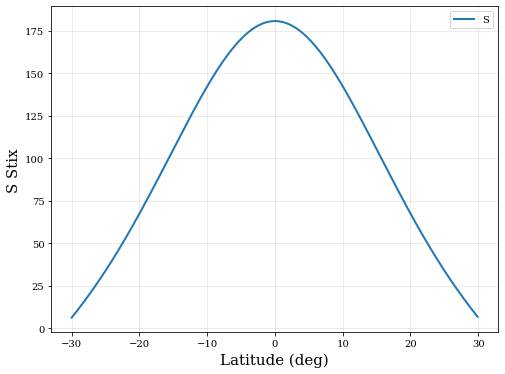

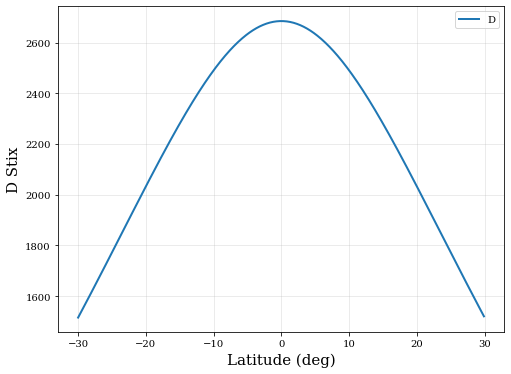

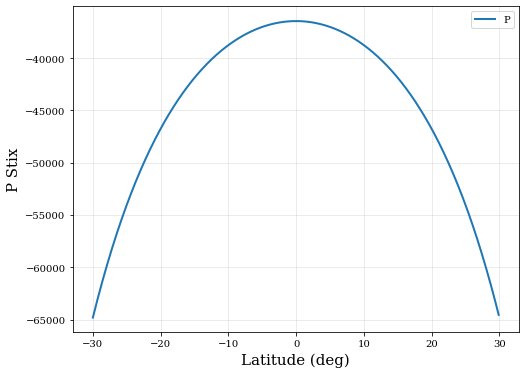

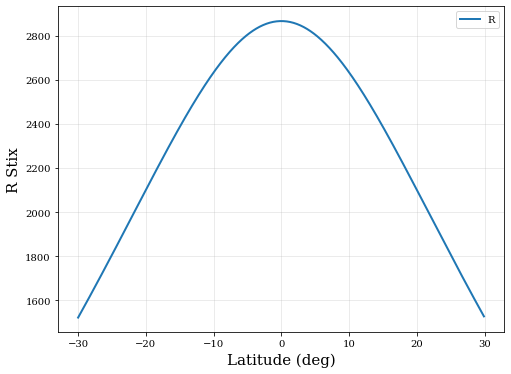

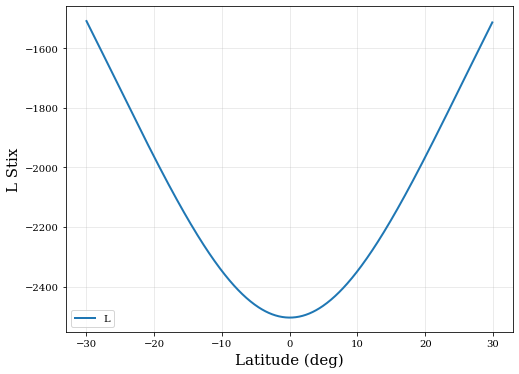

In [2]:
lats_deg = np.arange(-30,30,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4

Kpmax=1
day=0
mlt=2
Rsun=90
ne_lam=[]
Bmag=[]
ne_eq=env.density_equ_carpenter_anderson(L_shell,Kpmax,day,mlt,Rsun)
ne_eq=ne_eq*10**6
for i in range(0,len(lats_rad)):
    netmp=env.density_FL_denton(ne_eq,lats_rad[i])
    Bmagtmp=env.Bmag_dipole(L_shell,lats_rad[i])
    ne_lam.append(netmp)
    Bmag.append(Bmagtmp)


#(assuming 94%H+, 5.4%He+, 0.6%O+)
ne_lam=np.asarray(ne_lam)

Bmag=np.asarray(Bmag)
nH_lam=0.84*ne_lam
nHe_lam=0.054*ne_lam
nO_lam=0.006*ne_lam
#for a wave of f=2kHz
f_wave=1000
w_wave=2*np.pi*f_wave

S_,D_,P_,R_,L_=wave.stix_parameters(w_wave, ne_lam, nH_lam, nHe_lam, nO_lam, Bmag)

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15
ax.plot(lats_deg,S_,label='S',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'S Stix',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15
ax.plot(lats_deg,D_,label='D',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'D Stix',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,P_,label='P',linewidth=s)


# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'P Stix',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,R_,label='R',linewidth=s)


# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'R Stix',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,L_,label='L',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'L Stix',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()


[Return to top](#top-bullet) 

## 2. WPIT.WaveProperties_mod.refr_index_full <a class="anchor" id="ref_index-bullet"></a>

**Routine to calculate the the refractive index and the wave numbers**

***

**<font color='blue'>Description</font>**

We define:

$$A=S\sin^2\theta+P\cos^2\theta$$
$$B=RLsin^2\theta+PS(1+\cos^2\theta)$$
$$C=PRL$$

$$F^2=B^2-4AC=(RL-SP)^2\sin^4\theta + 4P^2D^2\cos^2\theta$$

$$\eta^2=\frac{B \pm F}{2A}$$


Also we have assumed, without loss of generality, that $\vec{k}=k(\sin\theta,0,\cos\theta)$

***

**<font color='red'>Inputs</font>**

**theta**: wave normal angle in rad

**S**:Stix S parameter

**P**:Stix P parameter

**R**:Stix R parameter

**L**:Stix L parameter

**D**:Stix D parameter

**w_wave_arg**: wave frequency


***

**<font color='green'>Outputs</font>**

**eta_sq_plus**: the plus (+) root of the dispersion relation

**eta_sq_minus**: the minus (-) root of the dispersion relation

**ref_ind**: refractive index (for the $n^2>0$ root)

**kappa**: wave number

**kappa_par**: parallel component of the wave number

**kappa_per**: perpendicular component of the wave number

***

**Reference**

Stix, Thomas H. Waves in plasmas. Springer Science & Business Media, 1992.

***

[Return to top](#top-bullet) 

## 3. WPIT.WaveProperties_mod.refr_index_appleton <a class="anchor" id="ref_index_appleton-bullet"></a>

**Routine to calculate the the refractive index and the wave numbers**

If only electrons are included with an assumed stationary ion background, the expression of the refractive index can be written as the Appleton-Hartree equation:
$$\mu^2=1-\frac{\frac{\omega_{pe}^2}{\omega^2}}{1-\frac{\omega_{He}^2 \sin^2 \theta}{2(\omega^2- \omega_{pe}^2)}\pm \Big[ \Big( \frac{\omega_{He}^2 \sin^2 \theta}{2(\omega^2- \omega_{pe}^2)}\Big) ^2 + \frac{\omega_{He}^2}{\omega^2}\cos ^2 \theta \Big] ^{1/2}} $$

***

**<font color='red'>Inputs</font>**

**w_arg**: wave frequency

**wpe_arg**: electron plasma frequency

**wce_arg**: electron cyclotron frequency

**theta_arg**: wave normal angle in rad

***

**<font color='green'>Outputs</font>**

**eta_sq_plus**: the plus (+) root of the dispersion relation

**eta_sq_minus**: the minus (-) root of the dispersion relation

**ref_ind**: refractive index (for the $n^2>0$ root)

**kappa**: wave number

**kappa_par**: parallel component of the wave number

**kappa_per**: perpendicular component of the wave number

***

**Reference**

Appleton, Edward V. "Wireless studies of the ionosphere." Institution of Electrical Engineers-Proceedings of the Wireless Section of the Institution 7.21 (1932): 257-265.

***

[Return to top](#top-bullet) 

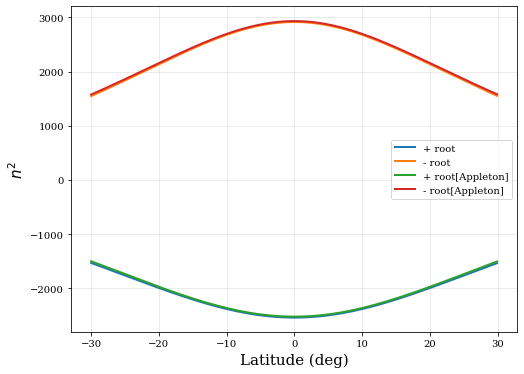

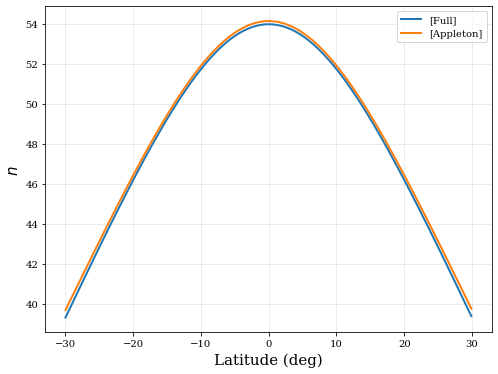

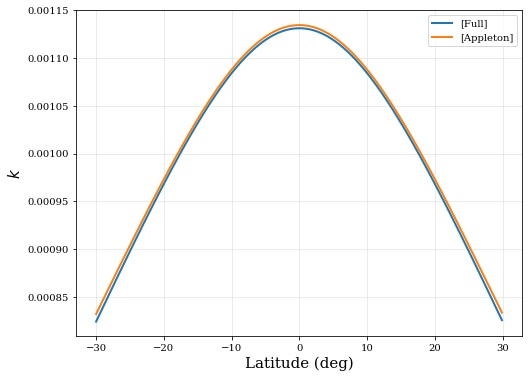

In [3]:
theta=np.deg2rad(10)
fwave=1000
w_wave=2*np.pi*fwave

wce=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)
wpe=env.omega_plasma(ne_lam,env.const.qe,env.const.me)

ref_ind=[]
kappa=[]
kappa_par=[]
kappa_per=[]
ref_ind_app=[]
kappa_app=[]
kappa_par_app=[]
kappa_per_app=[]
mu_sq_plus=[]
mu_sq_minus=[]
mu_sq_plus_app=[]
mu_sq_minus_app=[]  
    
for i in range(0,len(lats_rad)):
    mu_sq_plus_tmp,mu_sq_minus_tmp,ref_indtmp,kappatmp,kappa_partmp,kappa_pertmp=wave.refr_index_full(theta,w_wave,S_[i],P_[i],R_[i],L_[i])
    mu_sq_plus_tmp_app,mu_sq_minus_tmp_app,ref_indtmp_appl,kappatmp_appl,kappa_partmp_appl,kappa_pertmp_appl=wave.refr_index_appleton(w_wave,wpe[i],wce[i],theta)
    ref_ind.append(ref_indtmp)
    kappa.append(kappatmp)
    kappa_par.append(kappa_partmp)
    kappa_per.append(kappa_pertmp)
    ref_ind_app.append(ref_indtmp_appl)
    kappa_app.append(kappatmp_appl)
    kappa_par_app.append(kappa_partmp_appl)
    kappa_per_app.append(kappa_pertmp_appl)    
    mu_sq_plus.append(mu_sq_plus_tmp)
    mu_sq_minus.append(mu_sq_minus_tmp)
    mu_sq_plus_app.append(mu_sq_plus_tmp_app)
    mu_sq_minus_app.append(mu_sq_minus_tmp_app)    
    


###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,mu_sq_plus,label='+ root',linewidth=s)
ax.plot(lats_deg,mu_sq_minus,label='- root',linewidth=s)
ax.plot(lats_deg,mu_sq_plus_app,label='+ root[Appleton]',linewidth=s)
ax.plot(lats_deg,mu_sq_minus_app,label='- root[Appleton]',linewidth=s)
# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$n^2$',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()
###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,ref_ind,label='[Full]',linewidth=s)
ax.plot(lats_deg,ref_ind_app,label='[Appleton]',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$n$',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()
###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,kappa,label='[Full]',linewidth=s)
ax.plot(lats_deg,kappa_app,label='[Appleton]',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$k$',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

[Return to top](#top-bullet) 

### 5. WPIT.WaveProperties_mod.cold_dielectric_tensor <a class="anchor" id="dielectric_tensor_cold-bullet"></a>

**Calculate the compmonents of the cold plasma dielectric tensor**

***

**<font color='blue'>Description</font>**

The cold plasma dielectric tensor is given as:
 
 $$K^0 =  
\begin{bmatrix}
K_{11}^0 & K_{12}^0 & K_{13}^0\\
K_{21}^0 & K_{22}^0 & K_{23}^0 \\
K_{31}^0 & K_{32}^0 & K_{33}^0
\end{bmatrix}$$

$$K_{11}^0=1-\sum_j \frac{X_j}{1-Y_j^2}$$
$$K_{12}^0=i\sum_j \frac{X_jY_j}{1-Y_j^2}$$
$$K_{13}^0=0$$
$$K_{21}^0=-i\sum_j \frac{X_jY_j}{1-Y_j^2}$$
$$K_{22}^0=1-\sum_j \frac{X_j}{1-Y_j^2}$$
$$K_{23}^0=0$$
$$K_{31}^0=0$$
$$K_{32}^0=0$$
$$K_{33}^0=1-\sum_jX_j$$

where

$$X_j=\omega_{pj}^2/\omega^2$$
$$Y_j=\omega_{cj}/\omega$$

Then 

$$A_0=K_{11}^0\sin^2\psi + K_{33}^0\cos^2\psi$$
$$B_0=-[K_{11}^0K_{22}^0+K_{12}^0]\sin^2\psi-K_{33}^0[K_{11}^0+K_{22}^0\cos^2\psi]$$
$$C_0=K_{33}^0[(K_{12}^0)^2+K_{11}^0K_{22}^0$$

***

**<font color='red'>Inputs</font>**

**w_wave**: wave frequency

**wce_arg**: $e$ plasma frequency

**wpe_arg**: $e$ cyclotron frequency

**wcH_arg**: $H^+$ cyclotron frequency

**wpH_arg**: $H^+$ plasma frequency

**wcHe_arg**: $He^+$ cyclotron frequency

**wpHe_arg**: $He^+$ plasma frequency

**wcO_arg**: $O^+$ cyclotron frequency

**wpO_arg**: $O^+$ plasma frequency


***

**<font color='green'>Outputs</font>**

**K_11,K_12,K_13,K_21,K_22,K_23,K_31,K_32,K_33**: the cold dielectric tensor compoments 

***

**Reference**

Maxworth, A. S., et al. "Raytracing study of source regions of whistler mode wave power distribution relative to the plasmapause." Journal of Geophysical Research: Space Physics 125.4 (2020): e2019JA027154.


***
[Return to top](#top-bullet) 

### 6. waveproperties_mod.warm_dielectric_tensor <a class="anchor" id="dielectric_tensor_warm-bullet"></a>

**Calculate the dielectric tensor with warm plasma corrections**

***

**<font color='blue'>Description</font>**

By adding a linear temperature correction to the cold plasma dielectric tensor as: $K=K0+𝜏K1$, where $K$ is the total dielectric tensor, and $K1$ is the warm plasma correction, with $𝜏=q^T𝜇^2$. The components of K1 are given in Aubryetal.[1970] as:



$$K_{11}^1=\sum_j\Bigg[\frac{-X}{1-Y^2}\Bigg(\frac{3\sin^2\psi}{1-4Y^2}+\frac{1+3Y^2}{(1-Y^2)^2}\cos^2\psi   \Bigg)\Bigg]$$
$$K_{12}^1=\sum_j\Bigg[i\frac{X}{1-Y^2}\Bigg(\frac{6\sin^2\psi}{1-4Y^2}+\frac{3+Y^2}{(1-Y^2)^2}\cos^2\psi   \Bigg)\Bigg]$$
$$K_{13}^1=\sum_j\Bigg[\frac{2X}{(1-Y^2)^2}\sin\psi\cos\psi\Bigg]$$

$$K_{21}^1=-K_{12}^1$$
$$K_{22}^1=\sum_j\Bigg[-\frac{X}{1-Y^2}\Bigg(\frac{1+8Y^2}{1-4Y^2}\sin^2\psi+\frac{1+3Y^2}{(1-Y^2)^2}\cos^2\psi   \Bigg)\Bigg]$$

$$K_{23}=\sum_j\Bigg[-i\frac{XY}{(1-Y^2)^2}(3-Y^2)\sin\psi\cos\psi\Bigg]$$
$$K_{31}^1=K_{13}^1$$
$$K_{32}^1=-K_{23}^1$$
$$K_{33}^1=\sum_j\Bigg[-X\Bigg(3\cos^2\psi+\frac{\sin^2\psi}{1-Y^2}   \Bigg)\Bigg]$$


Then

$$A1=K_{11}^1\sin^2\psi+K_{33}^1\cos^2\psi+2K_{13}^1\sin\psi\cos\psi$$
$$B_1=-[K_{11}^1K_{22}^0+K_{22}^1K_{11}^0+2K_{12}^0K_{21}^1]\sin^2\psi-K_{33}^1[K_11^0+K_{22}^0\cos^2\psi]-K_{33}^0[K_{11}^0+K_{22}^0\cos^2\psi]+2\sin\psi\cos\psi[K_{12}^0K_{23}^1-K_{13}^1K_{22}^0]$$

$$C_1=K_{33}^1[(K_{12}^0)^2+K_11{0}K_22{0}]+K_{33}^0[2K_{12}^0K_{12}^1+K_{11}^0K_{22}^1+K_{11}^1+K_{22}^0]$$

***

**<font color='red'>Inputs</font>**

**w_wave**: wave frequency

**wce_arg**: $e$ plasma frequency

**wpe_arg**: $e$ cyclotron frequency

**wcH_arg**: $H^+$ cyclotron frequency

**wpH_arg**: $H^+$ plasma frequency

**wcHe_arg**: $He^+$ cyclotron frequency

**wpHe_arg**: $He^+$ plasma frequency

**wcO_arg**: $O^+$ cyclotron frequency

**wpO_arg**: $O^+$ plasma frequency

**psi_arg**: wave normal angle in rad


***

**<font color='green'>Outputs</font>**


**K_e**:the electron warm dielectric tensor compoments

**K_H**:the hydrogen warm dielectric tensor compoments

**K_He**:the helium warm dielectric tensor compoments

**K_O**: the oxygen warm dielectric tensor compoments 

***

**Reference**

Aubry, M. P., J. Bitoun, and Ph. Graff (1970), Propagation and group velocity in a warm magnetoplasma,Radio Sci.,5, 635–645.

Kulkarni, P., M. Golkowski, U. S. Inan, and T. F. Bell (2015), The effect of electron and ion temperature on the refractive index surface of
1–10 kHz whistler mode waves in the inner magnetosphere, J. Geophys. Res. Space Physics, 120, 581–591, doi:10.1002/2014JA020669.

***
[Return to top](#top-bullet) 

### 7. WPIT.WaveProperties_mod.refr_index_warm <a class="anchor" id="warm_refractive_index-bullet"></a>

**Calculate the refractive index accounting warm plasma corrections**

***

**<font color='blue'>Description</font>**

$$A_0=K_{11}^0\sin^2\psi + K_{33}^0\cos^2\psi$$
$$B_0=-[K_{11}^0K_{22}^0+K_{12}^0]\sin^2\psi-K_{33}^0[K_{11}^0+K_{22}^0\cos^2\psi]$$
$$C_0=K_{33}^0[(K_{12}^0)^2+K_{11}^0K_{22}^0$$

$$A1=K_{11}^1\sin^2\psi+K_{33}^1\cos^2\psi+2K_{13}^1\sin\psi\cos\psi$$

$$B_1=-[K_{11}^1K_{22}^0+K_{22}^1K_{11}^0+2K_{12}^0K_{21}^1]\sin^2\psi-K_{33}^1[K_11^0+K_{22}^0\cos^2\psi]-K_{33}^0[K_{11}^0+K_{22}^0\cos^2\psi]+2\sin\psi\cos\psi[K_{12}^0K_{23}^1-K_{13}^1K_{22}^0]$$

$$C_1=K_{33}^1[(K_{12}^0)^2+K_11{0}K_22{0}]+K_{33}^0[2K_{12}^0K_{12}^1+K_{11}^0K_{22}^1+K_{11}^1+K_{22}^0]$$

Then, the refractive index can be calulated by solving the following equation:

$$\sum_s q_s^T A_{1s} \mu^6 +\Big(A_0 + \sum_s q_s^TB_{1s}\Big)\mu^4+\Big( B_0+ \sum_s q_s^T C_{1s}\Big)\mu^2 +C_0=0$$
***

**<font color='red'>Inputs</font>**


**K_e**:the electron warm dielectric tensor compoments

**K_H**:the hydrogen warm dielectric tensor compoments

**K_He**:the helium warm dielectric tensor compoments

**K_O**: the oxygen warm dielectric tensor compoments 

**psi_arg**: wave normal angle in rad

**Te**: electron temperature in eV

**Ti**: ion temperature in eV

**K110**: K11 componento of the cold dielectric tensor

**K220**: K22 componento of the cold dielectric tensor

**K330**: K33 componento of the cold dielectric tensor

**K120**: K12 componento of the cold dielectric tensor

**w_wave_arg**: wave frequency

***

**<font color='green'>Outputs</font>**


**ref_ind**: refractive index

**kappa**: warm wave number

**kappa_par**: warm parallel wave number

**kappa_per**: warm perpendicular wave number

***

**Refence**

Kulkarni, P., M. Golkowski, U. S. Inan, and T. F. Bell (2015), The effect of electron and ion temperature on the refractive index surface of
1–10 kHz whistler mode waves in the inner magnetosphere, J. Geophys. Res. Space Physics, 120, 581–591, doi:10.1002/2014JA020669.

***
[Return to top](#top-bullet) 

In [4]:
lat=np.deg2rad(0)
L_shell=2
Bmag=env.Bmag_dipole(L_shell,lat)
Kpmax=0.22
day=0
mlt=2
Rsun=90

theta=np.deg2rad(88)
ne_eq=env.density_equ_carpenter_anderson(L_shell,Kpmax,day,mlt,Rsun)
ne_eq=ne_eq*10**6
# print(ne_eq/10**7)

#assuming 84%H+, 5.4%He+, 0.6%O+
nH_eq=0.84*ne_eq
nHe_eq=0.054*ne_eq
nO_eq=0.006*ne_eq

wce_=env.omega_cyclotron(Bmag,env.const.qe,env.const.me)
wcH=env.omega_cyclotron(Bmag,env.const.qi,env.const.mH)
wcHe=env.omega_cyclotron(Bmag,env.const.qi,env.const.mHe)
wcO=env.omega_cyclotron(Bmag,env.const.qi,env.const.mO)

wpe=env.omega_plasma(ne_eq,env.const.qe,env.const.me)
wpH=env.omega_plasma(nH_eq,env.const.qi,env.const.mH)
wpHe=env.omega_plasma(nHe_eq,env.const.qe,env.const.mHe)
wpO=env.omega_plasma(nO_eq,env.const.qi,env.const.mO)

wlhr=env.omega_lhr(wce_,wpe,wcH,wpH)

f_wave=3000
w_wave=2*np.pi*f_wave

S_tmp,D_tmp,P_tmp,R_tmp,L_tmp=wave.stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, Bmag)


mu_sq_plus_tmp,mu_sq_minus_tmp,ref_indtmp,kappatmp,kappa_partmp,kappa_pertmp=wave.refr_index_full(theta,w_wave,S_tmp,P_tmp,R_tmp,L_tmp)

K_11,K_12,K_13,K_21,K_22,K_23,K_31,K_32,K_33=wave.cold_dielectric_tensor(w_wave,wce_,wpe,wcH,wpH,wcHe,wpHe,wcO,wpO)


Ke,KH,KHe,KO=wave.warm_dielectric_tensor(w_wave,wce_,wpe,wcH,wpH,wcHe,wpHe,wcO,wpO,theta)

Te=1
Ti=1
ref_ind_warm,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,theta,Te,Ti,K_11,K_22,K_33,K_12,w_wave)
S_warm,D_warm,P_warm,R_warm,L_warm=wave.stix_parameters_warm(S_tmp,D_tmp,P_tmp,Te,Ti,ref_ind_warm,Ke,KH,KHe,KO)


theta_res=wave.res_angle(P_tmp,S_tmp)


In [5]:
#refractive index surface
thetas=np.arange(0,360,0.01)
thetas_rad=np.deg2rad(thetas)

mupar_cold=[]
muper_cold=[]
mupar_warm_e1_i0=[]
muper_warm_e1_i0=[]
mupar_warm_e0_i1=[]
muper_warm_e0_i1=[]
mupar_warm_e1_i1=[]
muper_warm_e1_i1=[]
mupar_warm_e4_i4=[]
muper_warm_e4_i4=[]
for i in range(0,len(thetas_rad)):
    
    mu_sq_plus_tmp,mu_sq_minus_tmp,ref_cold,kappatmp,kappa_partmp,kappa_pertmp=wave.refr_index_full(thetas_rad[i],w_wave,S_tmp,P_tmp,R_tmp,L_tmp)
    Ke,KH,KHe,KO=wave.warm_dielectric_tensor(w_wave,wce_,wpe,wcH,wpH,wcHe,wpHe,wcO,wpO,thetas_rad[i])
    ref_ind_warm10,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],1,0,K_11,K_22,K_33,K_12,w_wave)
    ref_ind_warm01,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],0,1,K_11,K_22,K_33,K_12,w_wave)
    ref_ind_warm11,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],1,1,K_11,K_22,K_33,K_12,w_wave)
    ref_ind_warm44,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke,KH,KHe,KO,thetas_rad[i],4,4,K_11,K_22,K_33,K_12,w_wave)
    
    
    ref_par_cold_tmp=ref_cold*np.cos(thetas_rad[i])
    ref_per_cold_tmp=ref_cold*np.sin(thetas_rad[i])
    ref_par_warm_tmp10=ref_ind_warm10*np.cos(thetas_rad[i])
    ref_per_warm_tmp10=ref_ind_warm10*np.sin(thetas_rad[i])
    ref_par_warm_tmp01=ref_ind_warm01*np.cos(thetas_rad[i])
    ref_per_warm_tmp01=ref_ind_warm01*np.sin(thetas_rad[i])
    ref_par_warm_tmp11=ref_ind_warm11*np.cos(thetas_rad[i])
    ref_per_warm_tmp11=ref_ind_warm11*np.sin(thetas_rad[i])
    ref_par_warm_tmp44=ref_ind_warm44*np.cos(thetas_rad[i])
    ref_per_warm_tmp44=ref_ind_warm44*np.sin(thetas_rad[i])
    
    mupar_cold.append(ref_par_cold_tmp)
    muper_cold.append(ref_per_cold_tmp)
    mupar_warm_e1_i0.append(ref_par_warm_tmp10)
    muper_warm_e1_i0.append(ref_per_warm_tmp10)
    mupar_warm_e0_i1.append(ref_par_warm_tmp01)
    muper_warm_e0_i1.append(ref_per_warm_tmp01)
    mupar_warm_e1_i1.append(ref_par_warm_tmp11)
    muper_warm_e1_i1.append(ref_per_warm_tmp11)
    mupar_warm_e4_i4.append(ref_par_warm_tmp44)
    muper_warm_e4_i4.append(ref_per_warm_tmp44)

/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/WPIT/WaveProperties_mod/refr_index_full.py:75: RuntimeWarning: invalid value encountered in sqrt
  ref_ind=np.sqrt(refsq)


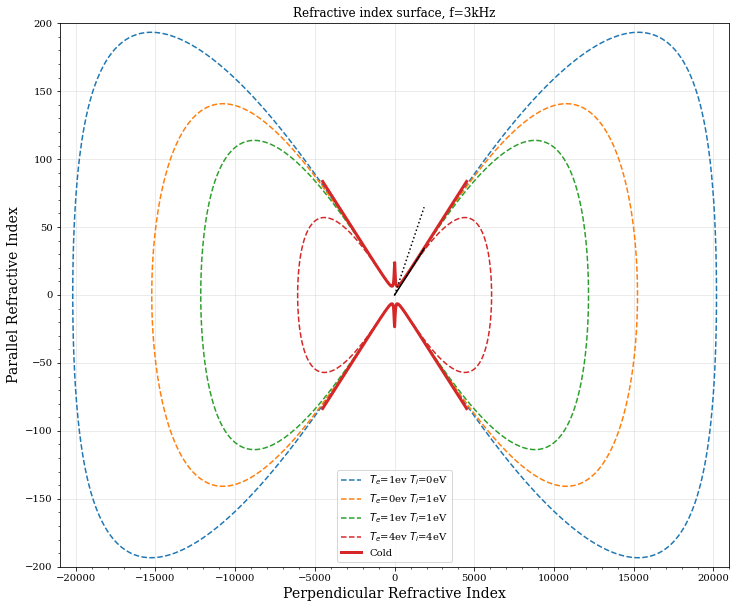

In [6]:
###########################################################
fig, ax = plt.subplots(figsize=(12,10))
s=5
ax.set_title('Refractive index surface, f=3kHz')
ax.set_xlabel("Perpendicular Refractive Index",fontsize=14)
ax.set_ylabel("Parallel Refractive Index",fontsize=14)


ax.plot(muper_warm_e1_i0,mupar_warm_e1_i0,label=r'$T_e$=1ev $T_i$=0eV',linestyle='--')
ax.plot(muper_warm_e0_i1,mupar_warm_e0_i1,label=r'$T_e$=0ev $T_i$=1eV',linestyle='--')
ax.plot(muper_warm_e1_i1,mupar_warm_e1_i1,label=r'$T_e$=1ev $T_i$=1eV',linestyle='--')
ax.plot(muper_warm_e4_i4,mupar_warm_e4_i4,label=r'$T_e$=4ev $T_i$=4eV',linestyle='--')
ax.plot(muper_cold,mupar_cold,color="tab:red",label='Cold',linewidth=3)
scale=10
ax.plot([0, scale*ref_indtmp*np.sin(theta)], [0, scale*ref_indtmp*np.cos(theta)],color='black',linestyle='dotted')
ax.plot([0, scale*ref_indtmp*np.sin(theta_res)], [0, scale*ref_indtmp*np.cos(theta_res)],color='black')

ax.legend()
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.set_xlim(-21000,21000)
ax.set_ylim(-200,200)
ax.grid(alpha=.3)
plt.show()

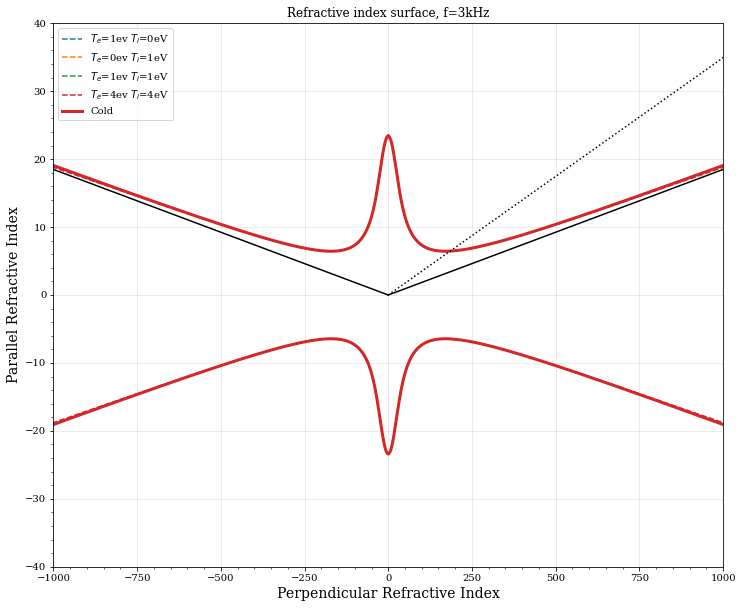

In [7]:
###########################################################
fig, ax = plt.subplots(figsize=(12,10))
s=5
ax.set_title('Refractive index surface, f=3kHz')
ax.set_xlabel("Perpendicular Refractive Index",fontsize=14)
ax.set_ylabel("Parallel Refractive Index",fontsize=14)


ax.plot(muper_warm_e1_i0,mupar_warm_e1_i0,label=r'$T_e$=1ev $T_i$=0eV',linestyle='--')
ax.plot(muper_warm_e0_i1,mupar_warm_e0_i1,label=r'$T_e$=0ev $T_i$=1eV',linestyle='--')
ax.plot(muper_warm_e1_i1,mupar_warm_e1_i1,label=r'$T_e$=1ev $T_i$=1eV',linestyle='--')
ax.plot(muper_warm_e4_i4,mupar_warm_e4_i4,label=r'$T_e$=4ev $T_i$=4eV',linestyle='--')
ax.plot(muper_cold,mupar_cold,color="tab:red",label='Cold',linewidth=3)
scale=10
ax.plot([0, scale*ref_indtmp*np.sin(theta)], [0, scale*ref_indtmp*np.cos(theta)],color='black',linestyle='dotted')
ax.plot([0, scale*ref_indtmp*np.sin(theta_res)], [0, scale*ref_indtmp*np.cos(theta_res)],color='black')
ax.plot([0, scale*ref_indtmp*np.sin(-theta_res)], [0, scale*ref_indtmp*np.cos(-theta_res)],color='black')
# ax.quiver([0, scale*ref_indtmp*np.sin(theta)], [0, scale*ref_indtmp*np.cos(theta)],color='black')
# ax.quiver([0, scale*ref_indtmp*np.sin(theta_res)], [0, theta_res*ref_indtmp*np.cos(theta)],color='gold')
ax.legend()
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.set_xlim(-1000,1000)
ax.set_ylim(-40,40)
ax.grid(alpha=.3)
plt.show()

[Return to top](#top-bullet) 

### 8. WPIT.WaveProperties_mod.stix_parameters_warm <a class="anchor" id="warm_stix_parameters-bullet"></a>

**Calculate Stix parameters with warm plasma corrections**

***

**<font color='blue'>Description</font>**

$$S_{warm}=S_{stix}+\tau_e K_{e11}^1 + \tau_i K_{i11}^1$$
$$D_{warm}=D_{stix}+\tau_e K_{e12}^1 + \tau_i K_{i12}^1$$
$$P_{warm}=P_{stix}+\tau_e K_{e33}^1 + \tau_i K_{i33}^1$$
$$R_{warm}=S_{warm}+D_{warm}$$
$$L_{warm}=S_{warm}-D_{warm}$$

with:

$$\tau_e=q_e^T\mu^2$$
$$\tau_e=q_i^T\mu^2$$
$$q_s^T=\frac{k_bT_s}{m_s c^2}$$
***

**<font color='red'>Inputs</font>**

**S_cold**: Stix S parameter

**D_cold**: Stix S parameter

**P_cold**: Stix S parameter

**Te**: Electron temperature in eV

**Ti**: Ion temperature in eV

**mu_warm**: warm plasma refractive index

**K_e**:the electron warm dielectric tensor compoments

**K_H**:the hydrogen warm dielectric tensor compoments

**K_He**:the helium warm dielectric tensor compoments

**K_O**: the oxygen warm dielectric tensor compoments 

***

**<font color='green'>Outputs</font>**


**S_warm**: warm plasma corrected Stix S

**D_warm**: warm plasma corrected Stix D

**P_warm**: warm plasma corrected Stix P

**R_warm**: warm plasma corrected Stix R

**L_warm**: warm plasma corrected Stix L

***

**Reference**

Maxworth, A. S., and M. Gołkowski. "Magnetospheric whistler mode ray tracing in a warm background plasma with finite electron and ion temperature." Journal of Geophysical Research: Space Physics 122.7 (2017): 7323-7335.

***
[Return to top](#top-bullet) 

3000000


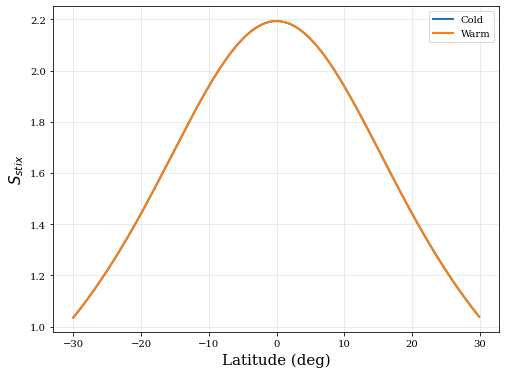

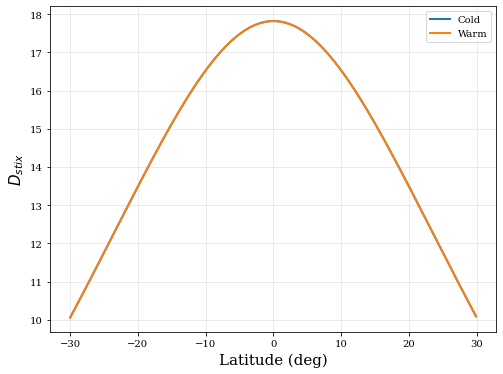

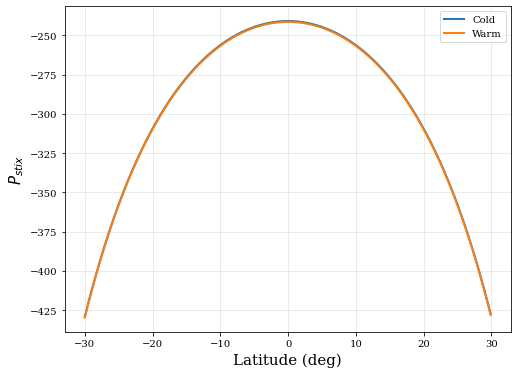

In [8]:
lats_deg = np.arange(-30,30,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4
f_wave=1000
w_wave=2*np.pi*f_wave
Kpmax=1
day=0
mlt=2
Rsun=90
ne_lam=[]
Bmag=[]
ne_eq=env.density_equ_carpenter_anderson(L_shell,Kpmax,day,mlt,Rsun)
theta=np.deg2rad(10)
ne_eq=3*10**6
print(ne_eq)
S_cold_=[]
D_cold_=[]
P_cold_=[]
S_warm_=[]
D_warm_=[]
P_warm_=[]

for i in range(0,len(lats_rad)):
    ne_stix=env.density_FL_denton(ne_eq,lats_rad[i])
    Bmag_stix=env.Bmag_dipole(L_shell,lats_rad[i])
    nH_stix=0.84*ne_stix
    nHe_stix=0.054*ne_stix
    nO_stix=0.006*ne_stix
    wce_stix=env.omega_cyclotron(Bmag_stix,env.const.qe,env.const.me)
    wcH_stix=env.omega_cyclotron(Bmag_stix,env.const.qi,env.const.mH)
    wcHe_stix=env.omega_cyclotron(Bmag_stix,env.const.qi,env.const.mHe)
    wcO_stix=env.omega_cyclotron(Bmag_stix,env.const.qi,env.const.mO)

    wpe_stix=env.omega_plasma(ne_stix,env.const.qe,env.const.me)
    wpH_stix=env.omega_plasma(nH_stix,env.const.qi,env.const.mH)
    wpHe_stix=env.omega_plasma(nHe_stix,env.const.qe,env.const.mHe)
    wpO_stix=env.omega_plasma(nO_stix,env.const.qi,env.const.mO)
    S_stix,D_stix,P_stix,R_stix,L_stix=wave.stix_parameters(w_wave, ne_stix, nH_stix, nHe_stix, nO_stix, Bmag_stix)
    K_11_stix,K_12_stix,K_13_stix,K_21_stix,K_22_stix,K_23_stix,K_31_stix,K_32_stix,K_33_stix=wave.cold_dielectric_tensor(w_wave,wce_stix,wpe_stix,wcH_stix,wpH_stix,wcHe_stix,wpHe_stix,wcO_stix,wpO_stix)

    Ke_stix,KH_stix,KHe_stix,KO_stix=wave.warm_dielectric_tensor(w_wave,wce_stix,wpe_stix,wcH_stix,wpH_stix,wcHe_stix,wpHe_stix,wcO_stix,wpO_stix,theta)

    Te=20
    Ti=20
    ref_ind_warm,kappa_warm,kappa_par_warm,kappa_per_warm=wave.refr_index_warm(Ke_stix,KH_stix,KHe_stix,KO_stix,theta,Te,Ti,K_11_stix,K_22_stix,K_33_stix,K_12_stix,w_wave)
    S_warm,D_warm,P_warm,R_warm,L_warm=wave.stix_parameters_warm(S_stix,D_stix,P_stix,Te,Ti,ref_ind_warm,Ke_stix,KH_stix,KHe_stix,KO_stix)

    S_cold_.append(S_stix)
    D_cold_.append(D_stix)
    P_cold_.append(P_stix)
    S_warm_.append(S_warm)
    D_warm_.append(D_warm)
    P_warm_.append(P_warm)

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,S_cold_,label='Cold',linewidth=s)
ax.plot(lats_deg,S_warm_,label='Warm',linewidth=s)


ax.grid(alpha=.3)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$S_{stix}$',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()
###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,D_cold_,label='Cold',linewidth=s)
ax.plot(lats_deg,D_warm_,label='Warm',linewidth=s)


ax.grid(alpha=.3)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$D_{stix}$',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()
###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,P_cold_,label='Cold',linewidth=s)
ax.plot(lats_deg,P_warm_,label='Warm',linewidth=s)


ax.grid(alpha=.3)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$P_{stix}$',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

[Return to top](#top-bullet) 

## 9. WPIT.WaveProperties_mod.res_angle  <a class="anchor" id="res_angle-bullet"></a>

**Routine to calculate the resonance angle**

***

**<font color='blue'>Description</font>**

$$\tan^2\theta_{res}=-\frac{P}{S}$$


***

**<font color='red'>Inputs</font>**

**P_arg**: Stix P parameter

**S_arg**: Stix S parameter

***

**<font color='green'>Outputs</font>**


**thetares**: resonance angle in rad

***

**Reference**

Stix, Thomas H. Waves in plasmas. Springer Science & Business Media, 1992.

***
[Return to top](#top-bullet) 


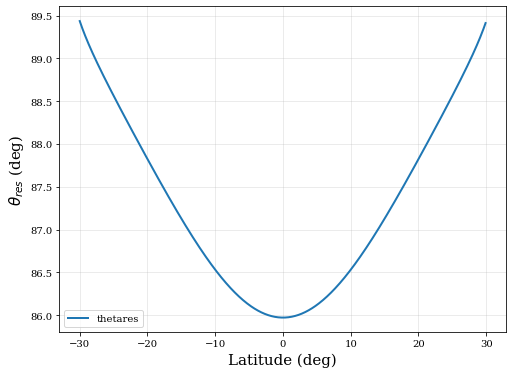

In [9]:

thetares_rad=wave.res_angle(P_,S_)


###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,np.rad2deg(thetares_rad),label='thetares',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$\theta_{res}$ (deg)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()


[Return to top](#top-bullet) 


## 10. waveproperties_mod.gendrin_angle  <a class="anchor" id="gendrin_angle-bullet"></a>

**Routine to calculate the Gendrin angle**

***

**<font color='blue'>Description</font>**

$$ \psi_G=  \left\{
\begin{array}{ll}
      undefined & f<f_{lhr} \\
      90^o & f=f_{lhr} \\
      \cos^{-1}\Big[\frac{2(f^2-f_{lhr}^2)}{f_{ce}f }\Big] & f_{lhr}<f<0.5f_{ce} \\
      0^o  &   0.5f_{ce} \leq f \leq f_{ce}\\
\end{array} 
\right. $$ 

***

**<font color='red'>Inputs</font>**

**w_wave_arg**: wave frequency

**wlhr_arg**: lower hybrid resonance frequency

**wce_arg**: electron gyrofrequency


***

**<font color='green'>Outputs</font>**

**th_gen**: Gendrin angle in rad

***

**Reference**

Bortnik, Jacob, Umran S. Inan, and Timothy F. Bell. "Landau damping and resultant unidirectional propagation of chorus waves." Geophysical research letters 33.3 (2006).

***
[Return to top](#top-bullet) 

[Return to top](#top-bullet) 


## 11. WPIT.WaveProperties_mod.wave_amplitudes_bell  <a class="anchor" id="wave_amplitudes_bell-bullet"></a>

**Routine to calculate the wave amplitudes**

***

**<font color='blue'>Description</font>**

We use Cartesian coordinate system, with $\hat{z}||\vec{B_0}$ and $\hat{x}$ pointing towards higher L-shells. According to Bell [1984], we write the oblique whistler wave components as:

$${\vec{E}}^w = -\hat{x} E_x^w \sin \Phi +\hat{y} E_y^w \cos \Phi - \hat{z} E_z^w \sin \Phi $$
$${\vec{B}}^w = \hat{x} B_x^w \cos \Phi +\hat{y} B_y^w \sin \Phi - \hat{z} B_z^w \cos \Phi $$

where $\Phi(\vec{r})= \int \omega dt - \int \vec{k} \cdot d\vec{r}$ is the wave phase. The wave fields satisfy:
$$B_x/B_y=-\frac{D(P- \mu^2 \sin^2 \psi)}{P(S-\mu^2)} $$
$$B_z/B_y=\frac{D\sin \psi(P- \mu^2 \sin^2 \psi) }{P \cos \psi (S-\mu^2)} $$
$$E_x/B_y=\frac{c(P- \mu^2 \sin^2 \psi)}{\mu P \cos \psi}$$
$$E_y/B_y=\frac{Dc(P- \mu^2 \sin^2 \psi)}{\mu P \cos \psi (\mu^2-S)}$$
$$E_z/B_y=-\frac{c \mu \sin \psi)}{P}$$

***

**<font color='red'>Inputs</font>**

mu_arg: the refractive index

P_arg: Stix P parameter

D_arg: Stix D parameter

S_arg: Stix S parameter

Byw_arg: By component of the wave in T

theta_arg: wave normal angle in rad

***

**<font color='green'>Outputs</font>**


Bxw_arg:Bx component of the wave in T

Byw_arg:By component of the wave in T

Bzw_arg:Bz component of the wave in T

Exw_arg:Ex component of the wave in V/m

Eyw_arg:Ey component of the wave in V/m

Ezw_arg:Ez component of the wave in V/m

***

**Reference**

Bortnik, Jacob. Precipitation of radiation belt electrons by lightning-generated magnetospherically reflecting whistler waves. stanford university, 2004.

***

[Return to top](#top-bullet) 

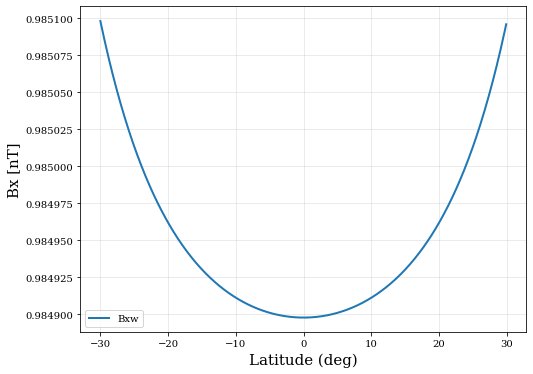

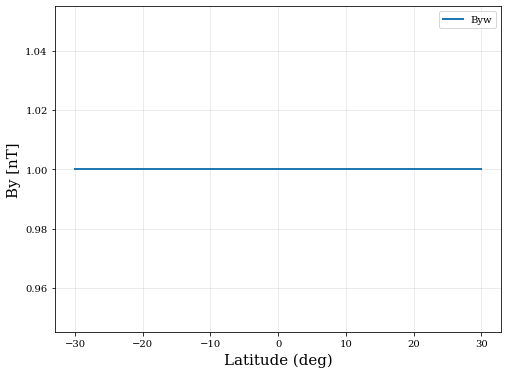

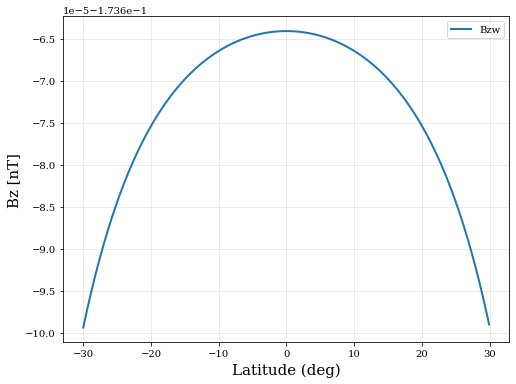

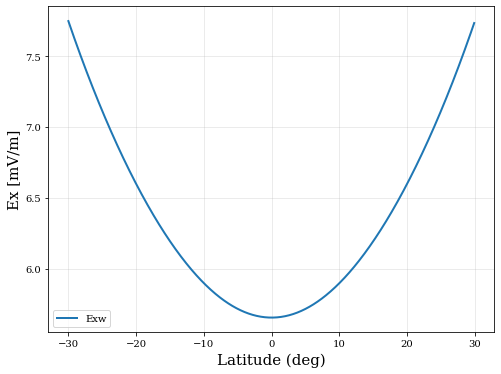

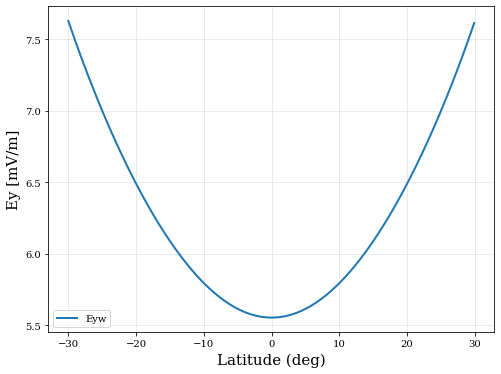

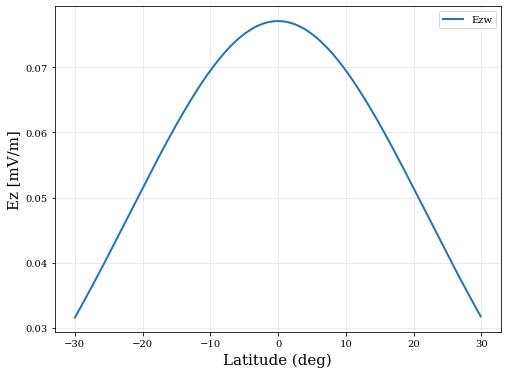

In [10]:

Byw_=np.empty(len(ref_ind))
Byw_.fill(10**(-9))#1nT
ref_ind=np.asarray(ref_ind)
theta=np.deg2rad(10)
Bxw_, Byw_, Bzw_, Exw_, Eyw_, Ezw_=wave.wave_amplitudes_bell(ref_ind,P_,D_,S_,Byw_,theta)

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,Bxw_/(10**(-9)),label='Bxw',linewidth=s)


# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Bx [nT]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Byw_/(10**(-9)),label='Byw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'By [nT]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Bzw_/(10**(-9)),label='Bzw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Bz [nT]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,Exw_/(10**(-3)),label='Exw',linewidth=s)


# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Ex [mV/m]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Eyw_/(10**(-3)),label='Eyw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Ey [mV/m]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Ezw_/(10**(-3)),label='Ezw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Ez [mV/m]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

[Return to top](#top-bullet) 


## 12. WPIT.WaveProperties_mod.wave_amplitudes_li <a class="anchor" id="wave_amplitudes_li-bullet"></a>

**Routine to calculate the wave amplitudes**

***

**<font color='blue'>Description</font>**

According to Li et al.(2015) a monochromatic whistler-mode wave that propagates in the x-z plane at an angle $\psi$ with respect to the z axis are written as:
$$\vec{B}^w=\vec{B}_0^w e^{i\phi}$$
$$\vec{E}^w=\vec{E}_0^w e^{i\phi}$$
where $\Phi=\omega t - \int{\vec{k}}\cdot d\vec{r}$ is the wave phase, and the wave normal vector is given as $\vec{k}=(k_{\perp},0,k_{\parallel})$, where $k_{\perp}=k \cos \psi$ and $k_{\parallel}=k \sin \psi$.
Using cold plasma theory [8]:
$$\vec{B}^w=\hat{e}_x B_x^w \cos \Phi + \hat{e}_y B_y^w \sin \Phi + \hat{e}_z B_z^w \cos \Phi $$
$$\vec{E}^w=\hat{e}_x E_x^w \sin \Phi + \hat{e}_y E_y^w \cos \Phi + \hat{e}_z E_z^w \sin \Phi $$

where given the total magnetic wave amplitute $B_{tot}^w$:
$$E_x^w=I^w c(S-\mu^2)(P-\mu^2 \sin ^2 \psi)$$
$$E_y^w=I^w cD (P-\mu^2 \sin^2 \psi)$$
$$E_z^w=-I^w c\mu^2 \cos \psi \sin \psi (S-\mu^2)$$
$$B_x^w=-I^w D \cos \psi (P - \mu^2 \sin^2 \psi)\mu$$
$$B_y^w=I^wP\cos\psi (S-\mu^2)\mu$$
$$B_z^w=I^w D \sin \psi (P-\mu^2 \sin^2 \psi)\mu$$

and

$$I^w=\frac {B_{tot}^w}{\mu \sqrt{D^2 (P- \mu^2 \sin^2 \psi)^2 + P^2 \cos^2 \psi (S-\mu^2)^2}} $$


***

**<font color='red'>Inputs</font>**

**mu**: the refractive index

**P**: Stix P parameter

**D**: Stix D parameter

**S**: Stix S parameter

**Bw_tot_li**: magnitude of the magentic field of the wave in T

**psi**: wave normal angle in rad

***

**<font color='green'>Outputs</font>**

**Bxw_arg**:Bx component of the wave in T

**Byw_arg**:By component of the wave in T

**Bzw_arg**:Bz component of the wave in T

**Exw_arg**:Ex component of the wave in V/m

**Eyw_arg**:Ey component of the wave in V/m

**Ezw_arg**:Ez component of the wave in V/m

***

**Reference**

Li, Jinxing, et al. "Comparison of formulas for resonant interactions between energetic electrons and oblique whistler-mode waves." Physics of Plasmas 22.5 (2015): 052902.

***

[Return to top](#top-bullet) 

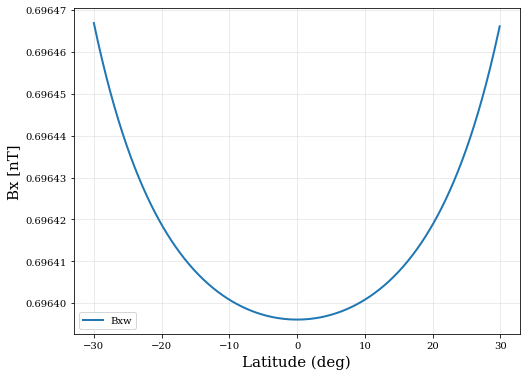

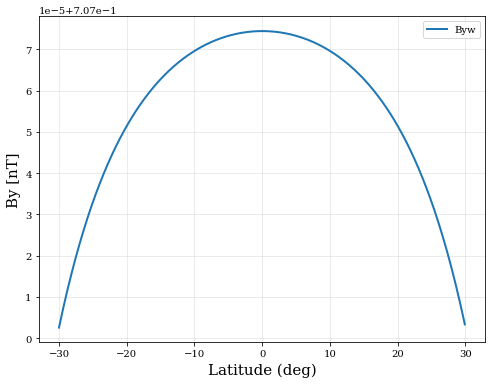

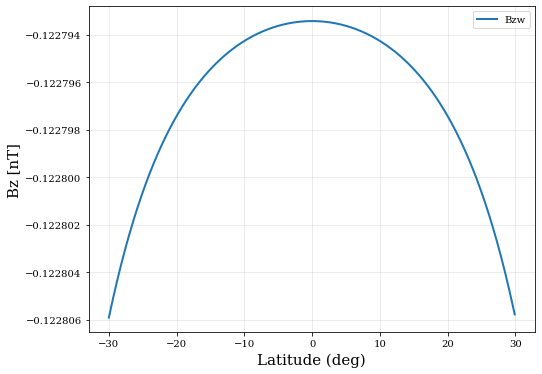

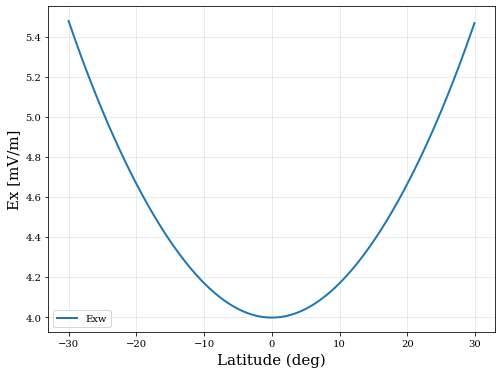

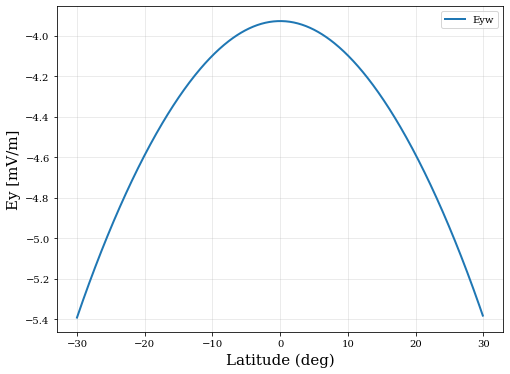

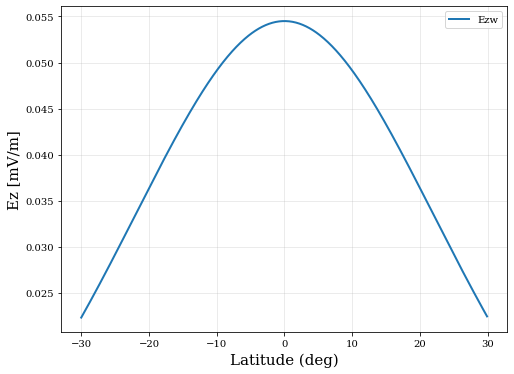

In [11]:

Byw_li=np.empty(len(ref_ind))
Byw_li.fill(1.4*10**(-9))#1nT
ref_ind=np.asarray(ref_ind)
theta=np.deg2rad(10)
Bxw_, Byw_, Bzw_, Exw_, Eyw_, Ezw_=wave.wave_amplitudes_li(ref_ind,P_,D_,S_,Byw_,theta)


###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,Bxw_/(10**(-9)),label='Bxw',linewidth=s)


# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Bx [nT]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Byw_/(10**(-9)),label='Byw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'By [nT]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Bzw_/(10**(-9)),label='Bzw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Bz [nT]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,Exw_/(10**(-3)),label='Exw',linewidth=s)


# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Ex [mV/m]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Eyw_/(10**(-3)),label='Eyw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Ey [mV/m]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Ezw_/(10**(-3)),label='Ezw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Ez [mV/m]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

[Return to top](#top-bullet) 


### 13. WPIT.WaveProperties_mod.wave_amplitudes_jasna <a class="anchor" id="wave_amplitudes_jasna-bullet"></a>

**Routine to calculate the wave amplitudes**

***

**<font color='blue'>Description</font>**

$$|B_y^w|^2=\frac{2\mu_0\rho_2^2X^2\mu\cos\theta|S^w|}{c\sqrt{(\tan\theta-\rho_1\rho_2X)^2+(1+\rho_2^2X^2)^2}}$$

where

$$X=\frac{P}{P-\mu^2\sin^2\theta}$$

$$\rho_1=\frac{E_z^w}{E_y^w}=\frac{(\mu^2-S)\mu^2\sin\theta\cos\theta}{D(\mu^2\sin^2\theta-P)}$$

$$\rho_2=\frac{E_x^w}{E_y^w}=\frac{\mu^2-S}{D}$$

The wave fields satisfy:
$$B_x/B_y=-\frac{D(P- \mu^2 \sin^2 \psi)}{P(S-\mu^2)} $$
$$B_z/B_y=\frac{D\sin \psi(P- \mu^2 \sin^2 \psi) }{P \cos \psi (S-\mu^2)} $$
$$E_x/B_y=\frac{c(P- \mu^2 \sin^2 \psi)}{\mu P \cos \psi}$$
$$E_y/B_y=\frac{Dc(P- \mu^2 \sin^2 \psi)}{\mu P \cos \psi (\mu^2-S)}$$
$$E_z/B_y=-\frac{c \mu \sin \psi)}{P}$$


***

**<font color='red'>Inputs</font>**

P: Stix P parameter

D: Stix D parameter

S: Stix S parameter

theta_arg: wave normal angle in rad

ref_arg: refractive index

power_arg: wave Poynting flux in mW/m^2

***

**<font color='green'>Outputs</font>**


**Bxw_arg**:Bx component of the wave in T

**Byw_arg**:By component of the wave in T

**Bzw_arg**:Bz component of the wave in T

**Exw_arg**:Ex component of the wave in V/m

**Eyw_arg**:Ey component of the wave in V/m

**Ezw_arg**:Ez component of the wave in V/m

***

**Reference**

Jasna, D., Gyroresonant Scattering of Radiation Belt Electrons by
Oblique Whistler Waves, Stanford University Thesis, Palo Alto, 1993.

***

[Return to top](#top-bullet) 

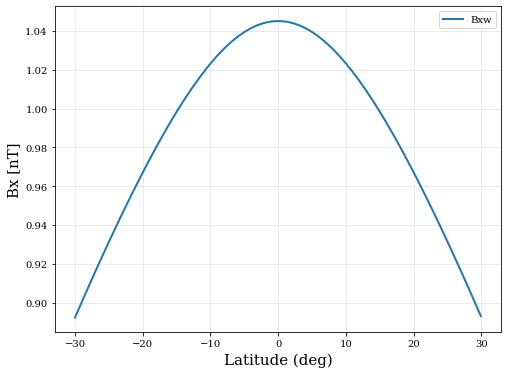

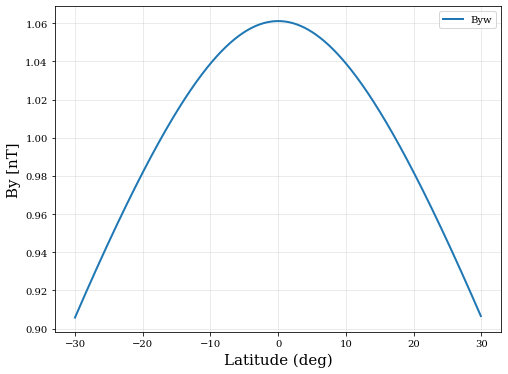

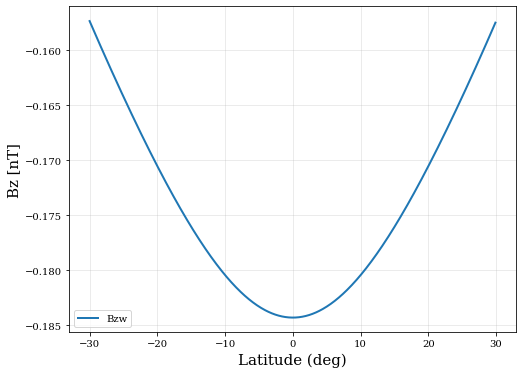

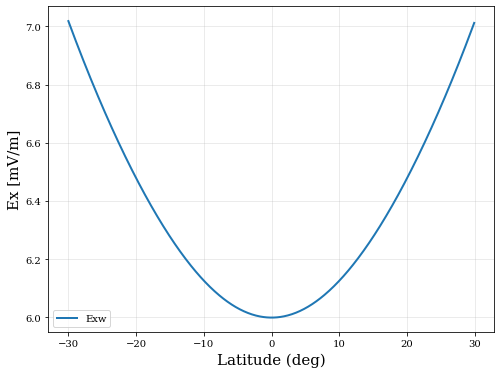

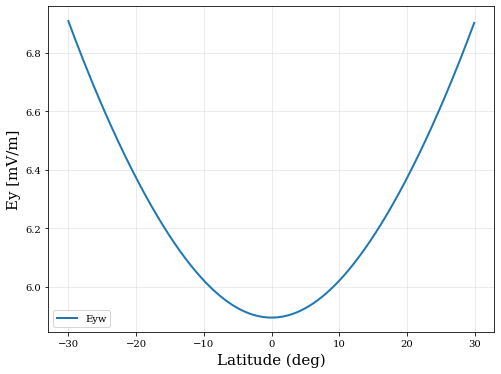

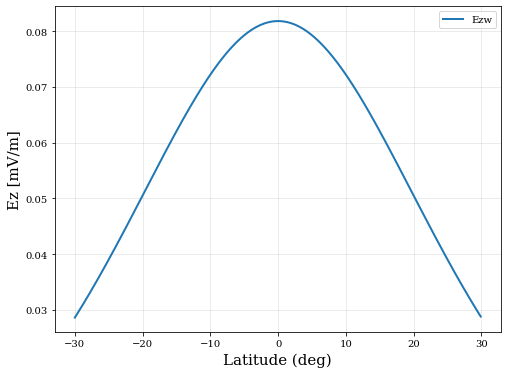

In [12]:

power=5*10**(-6)
ref_ind=np.asarray(ref_ind)
theta=np.deg2rad(10)

Bxw_, Byw_, Bzw_, Exw_, Eyw_, Ezw_=wave.wave_amplitudes_jasna(P_,S_,D_,theta,ref_ind,power)

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,Bxw_/(10**(-9)),label='Bxw',linewidth=s)


# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Bx [nT]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Byw_/(10**(-9)),label='Byw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'By [nT]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Bzw_/(10**(-9)),label='Bzw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Bz [nT]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,Exw_/(10**(-3)),label='Exw',linewidth=s)


# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Ex [mV/m]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Eyw_/(10**(-3)),label='Eyw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Ey [mV/m]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Ezw_/(10**(-3)),label='Ezw',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Ez [mV/m]',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

### 14. WPIT.WaveProperties_mod.resonant_velocity <a class="anchor" id="resonant_velocity-bullet"></a>

**Routine to calculate the resonant velocity and the resonant energy**

***

**<font color='blue'>Description</font>**

The resonance condition is:
$$ \frac{d \eta}{dt}= m \omega_H / \gamma - \omega -k_\parallel u_\parallel=0$$
which means that a resonance occurs when the Doppler-shifted frequency of the wave as experienced by the particle is equally to the particle
gyrofrequency (or an harmonic of it).
Substituting $\gamma = (1- u^2 /c^2)^{-1/2}$ with $u^2=u_\parallel^2 / \cos^2 \alpha$ and solving for the parallel velocity:
$$ u_\parallel^{res}=\frac{\sqrt{\omega^2 k_z^2+[(m\omega_H)^2-\omega^2] \Big[ k_z^2+ \Big( \frac{m \omega_H}{c \cos \alpha} \Big)^2 \Big]}-\omega k_z}{k_z^2+ \Big( \frac{m \omega_H}{c \cos \alpha} \Big)^2}$$

where the ± sign on the radical indicates the direction of travel of the particle, the
+(−) indicating counter-streaming (co-streaming) particles and must be used with positive (negative) m.


***

**<font color='red'>Inputs</font>**

**m_res_arg**: resonance harmonic number

**w_wave_arg**: wave frequency

**kz_arg**: z component of the wave number

**wce_arg**: gyrofrequency

**alpha_arg**: local pitch angle in rad

***

**<font color='green'>Outputs</font>**

**v_para_res**:parallel resonant velocity

**v_per_res**:perpendicular resonant velocity

**v_tot_res**:total resonant velocity

**E_res**:resonant energy in ergs

**gamma_res**: resonant Lorentz factor

***

**Reference**

Sousa, Austin Patrick. Global and seasonal effects of lightning-induced electron precipitation. Stanford University, 2018.

***

[Return to top](#top-bullet) 

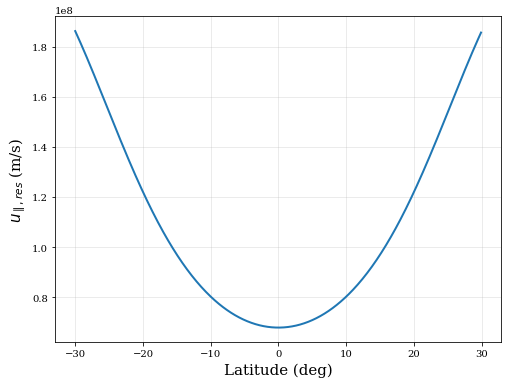

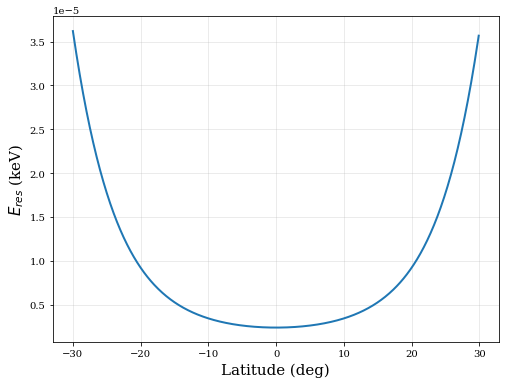

In [13]:
mres=1
alpha_=np.deg2rad(40)
upar_res=[]
uper_res=[]
Ek_res=[]
gamma_res=[]

for i in range(0,len(lats_deg)):
    v_para_res, v_per_res, v_tot_res, E_res,gamm_res=wave.resonant_velocity(mres,w_wave,kappa_par[i],wce[i],alpha_,env.const.me)
    upar_res.append(v_para_res)
    uper_res.append(v_per_res)
    Ek_res.append(E_res*624150636.3094) #to keV
    gamma_res.append(gamm_res)

##plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,upar_res,linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$u_{\parallel,res}$ (m/s)',fontsize=fonts)
# ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15


ax.plot(lats_deg,Ek_res,linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$E_{res}$ (keV)',fontsize=fonts)
# ax.legend()
# ax.set_ylim(0,5)

plt.show()

[Return to top](#top-bullet) 


### 15. WPIT.WaveProperties_mod.wave_packet_one_sided <a class="anchor" id="one_sided_wave_packet-bullet"></a>

**Simulate a static, monochromatic and one-sided wave packet**

***

**<font color='blue'>Description</font>**

$$B_w=B_{w0}[tanh(-2\lambda-1)+1]/2$$

***

**<font color='red'>Inputs</font>**

**Bw0_arg**:Initial wave magnetic field amplitude

**lamda_arg**: latitude in rad

**shape**: the higher the sharper the packet edges

**location**: logation of HWHM

**direction**: south or north direction

***

**<font color='green'>Outputs</font>**

**Bwave**: wave B field magnitude

***

**Refence**

Bortnik, Jacob, R. M. Thorne, and Umran S. Inan. "Nonlinear interaction of energetic electrons with large amplitude chorus." Geophysical Research Letters 35.21 (2008).

***
[Return to top](#top-bullet) 


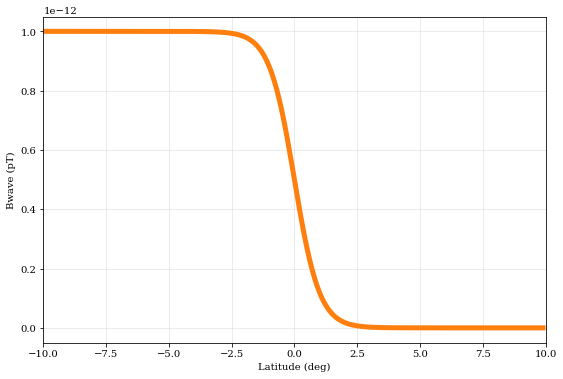

In [14]:
%matplotlib inline
shape=1
direction='south'
location=0
Bw_packet2=[]
lamda_packet2=np.arange(-10,10,0.1)
lamda_packet_rad2=np.deg2rad(lamda_packet2)
Byw0_packet2=1*10**(-12)

for i in range(0,len(lamda_packet2)):

    Bytmp=wave.wave_packet_one_sided(Byw0_packet2,lamda_packet_rad2[i],shape,location,direction)

    Bw_packet2.append(Bytmp)

    
fig, ax = plt.subplots(figsize=(9,6))
s=5
ax.plot(lamda_packet2,Bw_packet2,c='tab:orange',linewidth=s)
ax.grid(alpha=.3)
ax.set_xlim(-10,10)
ax.set_xlabel('Latitude (deg)')
ax.set_ylabel('Bwave (pT)')

# ax.set_ylim(-2,2)
ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
#     ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

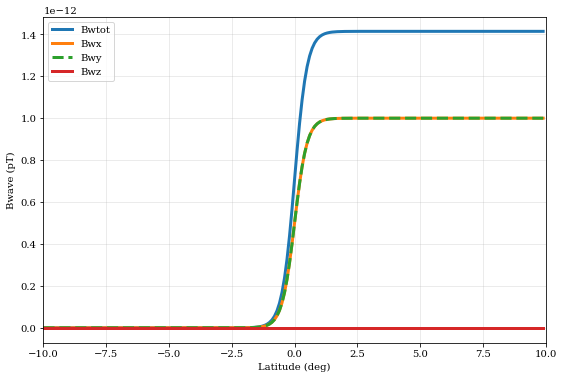

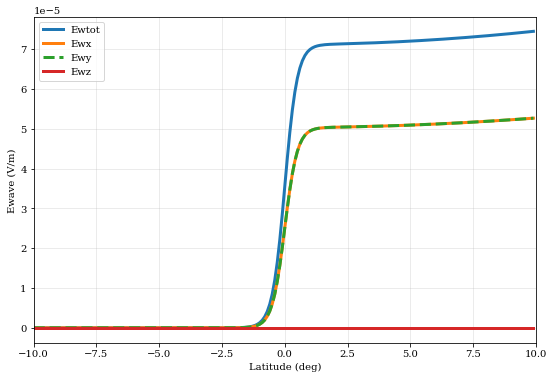

In [15]:

theta=np.deg2rad(0)

shape=2
direction='north'
location=0

lamda_packet2=np.arange(-10,10,0.1)
lamda_packet_rad2=np.deg2rad(lamda_packet2)
L_sim=4
f=2000
w_wave_sim=2*np.pi*f
Byw0_packet2=1*10**(-12)
Bw_packet2=[]
Bwx_packet=[]
Bwy_packet=[]
Bwz_packet=[]
Ew_packet2=[]
Ewx_packet=[]
Ewy_packet=[]
Ewz_packet=[]
for i in range(0,len(lamda_packet2)):
    B0_packet2 =env.Bmag_dipole(L_sim,lamda_packet_rad2[i])

    ne_eq=10**7
    ne_packet2=env.density_FL_denton(ne_eq,lamda_packet_rad2[i])

    #(assuming 94%H+, 5.4%He+, 0.6%O+)
    nH_packet2=0.84*ne_packet2
    nHe_packet2=0.054*ne_packet2
    nO_packet2=0.006*ne_packet2
    

    S_packet2,D_packet2,P_packet2,R_packet2,L_packet2=wave.stix_parameters(w_wave_sim, ne_packet2,nH_packet2,nHe_packet2,nO_packet2, B0_packet2)
    
#     print(D_packet2)
    wce=env.omega_cyclotron(B0_packet2,env.const.qe,env.const.me)
    wpe=env.omega_plasma(ne_packet2,env.const.qe,env.const.me)

    mu_sq_plus_tmp,mu_sq_minus_tmp,mu_packet2,kappatmp,kappa_partmp,kappa_pertmp=wave.refr_index_full(theta,w_wave_sim,S_packet2,P_packet2,R_packet2,L_packet2)

    Bytmp=wave.wave_packet_one_sided(Byw0_packet2,lamda_packet_rad2[i],shape,location,direction)
    Bxw_packet2, Byw_packet2, Bzw_packet2, Exw_packet2, Eyw_packet2, Ezw_packet2=wave.wave_amplitudes_bell(mu_packet2,P_packet2,D_packet2,S_packet2,Bytmp,theta)
    
    Bwtot_packet2tmp=np.sqrt(Bxw_packet2*Bxw_packet2+Byw_packet2*Byw_packet2+Bzw_packet2*Bzw_packet2)
    Ewtot_packet2tmp=np.sqrt(Exw_packet2*Exw_packet2+Eyw_packet2*Eyw_packet2+Ezw_packet2*Ezw_packet2)
#     print(Bytmp)
    Bw_packet2.append(Bwtot_packet2tmp)

    Bwx_packet.append(Bxw_packet2)
    Bwy_packet.append(Byw_packet2)
    Bwz_packet.append(Bzw_packet2)
    Ew_packet2.append(Ewtot_packet2tmp)

    Ewx_packet.append(Exw_packet2)
    Ewy_packet.append(Eyw_packet2)
    Ewz_packet.append(Ezw_packet2)
    
fig, ax = plt.subplots(figsize=(9,6))
s=3
ax.plot(lamda_packet2,Bw_packet2,linewidth=s,label='Bwtot')
ax.plot(lamda_packet2,Bwx_packet,linewidth=s,label='Bwx')
ax.plot(lamda_packet2,Bwy_packet,linewidth=s,label='Bwy',linestyle='dashed')
ax.plot(lamda_packet2,Bwz_packet,linewidth=s,label='Bwz')
ax.grid(alpha=.3)
ax.set_xlim(-10,10)
ax.set_xlabel('Latitude (deg)')
ax.set_ylabel('Bwave (pT)')
ax.legend()
# ax.set_ylim(-2,2)
ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
#     ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

fig, ax = plt.subplots(figsize=(9,6))
s=3
ax.plot(lamda_packet2,Ew_packet2,linewidth=s,label='Ewtot')
ax.plot(lamda_packet2,Ewx_packet,linewidth=s,label='Ewx')
ax.plot(lamda_packet2,Ewy_packet,linewidth=s,label='Ewy',linestyle='dashed')
ax.plot(lamda_packet2,Ewz_packet,linewidth=s,label='Ewz')
ax.grid(alpha=.3)
ax.set_xlim(-10,10)
ax.set_xlabel('Latitude (deg)')
ax.set_ylabel('Ewave (V/m)')
ax.legend()
# ax.set_ylim(-2,2)
ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
#     ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

[Return to top](#top-bullet) 

### 16. WPIT.WaveProperties_mod.wave_packet_two_sided <a class="anchor" id="two_sided_wave_packet-bullet"></a>

**Simulate a static, monochromatic and two-sided wave packet**

***

**<font color='blue'>Description</font>**

$$ B_w=  \left\{
\begin{array}{ll}
      B_{w0}-B_{w0}[tanh(-1*shape*\lambda-2*location)+1] & \lambda<0 \\
      B_{w0}-B_{w0}[tanh(1*shape*\lambda-2*location)+1] & \lambda<0 \\
\end{array} 
\right. $$ 


***

**<font color='red'>Inputs</font>**

**Bw0_arg**: initial wave B field magnitude

**lamda_arg**: latitude in rad 

**shape**: the higher the sharper the packet edges

**location**: logation of HWHM

***

**<font color='green'>Outputs</font>**

**Bwave**: wave B field magnitude

***

[Return to top](#top-bullet) 

### 17. waveproperties_mod.two_sided_wave_packet_gauss <a class="anchor" id="two_sided_wave_packet_gauss-bullet"></a>

**Simulate a static, monochromatic gaussian wave packet**

***

**<font color='blue'>Description</font>**

$$B_w=B_{w0}exp(-\lambda^2/\lambda_w^2)$$

***

**<font color='red'>Inputs</font>**

**Bw0_arg**: initial wave B field magnitude

**lamda_arg**: latitude in rad

**lamdaw_arg**: latitudinal range


***

**<font color='green'>Outputs</font>**

**Bwave**: wave B field magnitude

***

[Return to top](#top-bullet) 

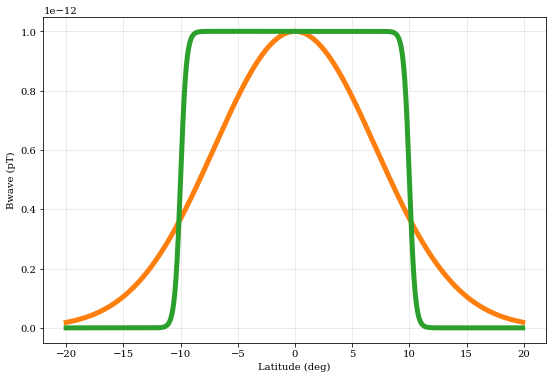

In [16]:

%matplotlib inline
shape=2
location=10
Bw_packet_gauss=[]
Bw_packet=[]
lamda_packet2=np.arange(-20,20,0.1)
lamda_packet_rad2=np.deg2rad(lamda_packet2)
Byw0_packet2=1*10**(-12)
lamda_range=np.deg2rad(10)
for i in range(0,len(lamda_packet2)):

    Bytmp=wave.wave_packet_gauss(Byw0_packet2,lamda_packet_rad2[i],lamda_range)
    Bytmp2=wave.wave_packet_two_sided(Byw0_packet2,lamda_packet_rad2[i],shape,location)

    Bw_packet.append(Bytmp2)
    Bw_packet_gauss.append(Bytmp)

    
fig, ax = plt.subplots(figsize=(9,6))
s=5
ax.plot(lamda_packet2,Bw_packet_gauss,c='tab:orange',linewidth=s)
ax.plot(lamda_packet2,Bw_packet,c='tab:green',linewidth=s)
ax.grid(alpha=.3)
# ax.set_xlim(-10,10)
ax.set_xlabel('Latitude (deg)')
ax.set_ylabel('Bwave (pT)')

# ax.set_ylim(-2,2)
ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
#     ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

[Return to top](#top-bullet) 

### 18. WPIT.WaveProperties_mod.dispersion_R <a class="anchor" id="R_dispersion-bullet"></a>

**Dispersion relation of R-mode wave**

***

**<font color='blue'>Description</font>**

$$n_R^2=\frac{k^2c^2}{\omega^2}=R_{stix}=1-\sum_{s} \frac{\omega_{ps}^2}{\omega(\omega+\Omega_{Hs})}$$

***

**<font color='red'>Inputs</font>**

**w**: wave frequency

**wpe**: electron plasma frequency

**wce**: electron cyclotron frequency

**wpH**: hydrogen plasma frequency

**wcH**: hydrogen cyclotron frequency

**wpHe**: helium plasma frequency (if available, else 0) 

**wcHe**: helium cyclotron frequency (if available, else 0)

**wpO**: oxygen plasma frequency (if available, else 0)

**wcO**: oxygen cyclotron frequency (if available, else 0)


***

**<font color='green'>Outputs</font>**

**nsq_tmp**: squared refractive index

**kappa_tmp**: wave number

***

[Return to top](#top-bullet) 

### 19. waveproperties_mod.L_dispersion <a class="anchor" id="L_dispersion-bullet"></a>

**Dispersion relation of L-mode wave**

***

**<font color='blue'>Description</font>**

$$n_L^2=\frac{k^2c^2}{\omega^2}=L_{stix}=1-\sum_{s} \frac{\omega_{ps}^2}{\omega(\omega-\Omega_{Hs})}$$

***

**<font color='red'>Inputs</font>**


**w**: wave frequency

**wpe**: electron plasma frequency

**wce**: electron cyclotron frequency

**wpH**: hydrogen plasma frequency

**wcH**: hydrogen cyclotron frequency

**wpHe**: helium plasma frequency (if available, else 0) 

**wcHe**: helium cyclotron frequency (if available, else 0)

**wpO**: oxygen plasma frequency (if available, else 0)

**wcO**: oxygen cyclotron frequency (if available, else 0)


***

**<font color='green'>Outputs</font>**

**nsq_tmp**: squared refractive index

**kappa_tmp**: wave number

***

[Return to top](#top-bullet) 

### 20. WPIT.WaveProperties_mod.O_dispersion <a class="anchor" id="O_dispersion-bullet"></a>

**Dispersion relation of O-mode (ordinary) wave**

***

**<font color='blue'>Description</font>**

$$n_O^2=\frac{k^2c^2}{\omega^2}=P_{stix}=1-\sum_{s} \frac{\omega_{ps}^2}{\omega^2}$$

***

**<font color='red'>Inputs</font>**


**w**: wave frequency

**wpe**: electron plasma frequency

**wpH**: hydrogen plasma frequency

**wpHe**: helium plasma frequency (if available, else 0) 

**wpO**: oxygen plasma frequency (if available, else 0)


***

**<font color='green'>Outputs</font>**

**nsq_tmp**: squared refractive index

**kappa_tmp**: wave number

***

[Return to top](#top-bullet) 

### 21. WPIT.WaveProperties_mod.X_dispersion <a class="anchor" id="X_dispersion-bullet"></a>

**Dispersion relation of X-mode (extra-ordinary) wave**

***

**<font color='blue'>Description</font>**

$$n_X^2=\frac{k^2c^2}{\omega^2}=1-\sum_{s} \frac{(\omega_{ps}^2}{\omega^2)} \frac{(\omega^2-\omega_{pe}^2)}{\omega^2-\omega_{lhr}^2}$$

***

**<font color='red'>Inputs</font>**


**w**: wave frequency

**wpe**: electron plasma frequency

**wlh**: lower hybrid resonance frequency

***

**<font color='green'>Outputs</font>**

**nsq_tmp**: squared refractive index

**kappa_tmp**: wave number

***

[Return to top](#top-bullet) 


### 22. WPIT.WaveProperties_mod.light_dispersion <a class="anchor" id="X_dispersion-bullet"></a>

**Dispersion relation of light**

***

**<font color='blue'>Description</font>**

$$n_{light}^2=\frac{k^2c^2}{\omega^2}=\frac{\omega^2-\omega_{pe}^2}{\omega^2}$$

***

**<font color='red'>Inputs</font>**


**w**: wave frequency

**wpe**: electron plasma frequency


***

**<font color='green'>Outputs</font>**

**nsq_tmp**: squared refractive index

**kappa_tmp**: wave number

***

[Return to top](#top-bullet) 

### 23. WPIT.WaveProperties_mod.R_cutoff <a class="anchor" id="R_cutoff-bullet"></a>

**Cut-off frequency for R-mode waves**

***

**<font color='blue'>Description</font>**

$$R_{cut}=\frac{1}{2}\sqrt{\omega_{ce}^2+4\omega_{pe}^2}$$

***

**<font color='red'>Inputs</font>**


**wpe**: electron plasma frequency

**wce**: electron cyclotron frequency


***

**<font color='green'>Outputs</font>**

**tmp**: Cut-off frequency for R-mode waves

***

[Return to top](#top-bullet) 

### 24. WPIT.WaveProperties_mod.L_cutoff <a class="anchor" id="L_cutoff-bullet"></a>

**Cut-off frequency for L-mode waves**

***

**<font color='blue'>Description</font>**

$$L_{cut}=\frac{1}{2}\Big(-\omega_{ce}+ \sqrt{\omega_{ce}^2+4\omega_{pe}^2}\Big)$$

***

**<font color='red'>Inputs</font>**


**wpe**: electron plasma frequency

**wce**: electron cyclotron frequency


***

**<font color='green'>Outputs</font>**

**tmp**: Cut-off frequency for L-mode waves

***

**Reference**

Swanson, Donald Gary. Plasma waves. Elsevier, 2012.

***

[Return to top](#top-bullet) 

In [17]:

ne_nom=(10**10)  #m^-3
B_nom=4*10**(-5)  #T

#assuming two component plasma e-H (ne=nH)

valfven=B_nom/(np.sqrt(env.const.mu0*ne_nom*env.const.mH))

wpe_nom=env.omega_plasma(ne_nom,env.const.qe,env.const.me)
wce_nom=env.omega_cyclotron(B_nom,env.const.qe,env.const.me)

wpH_nom=env.omega_plasma(ne_nom,env.const.qe,env.const.mH)
wcH_nom=env.omega_cyclotron(B_nom,env.const.qe,env.const.mH)

def omega_lower_hybrid(wce,wpe,wci,wpi):
    fac1=1/(wci*wce)
    fac2=1/(wpi**2)
    sqrtfac=np.sqrt(fac1+fac2)
    tmp=1/sqrtfac
    return tmp

wlh=omega_lower_hybrid(wce_nom,wpe_nom,wcH_nom,wpH_nom)
wuh=env.omega_uhr(wce_nom,wpe_nom)
w_nom=(2/3)*wlh

warrmax=3*wce_nom
warray=np.arange(0,warrmax,100)


    
cutoff_l=wave.cutoff_L(wce_nom,wpe_nom)
cutoff_r=wave.cutoff_R(wce_nom,wpe_nom)

nsqR=[]
nsqL=[]

nsqR_2fluid=[]
nsqL_2fluid=[]

nsqlight=[]
nsqO=[]
nsqX=[]
nsqlight=[]

kR=[]
kL=[]
kR_2fluid=[]
kL_2fluid=[]
kX=[]
kO=[]
klight=[]
kwc=[]
kwalfven=[]
kperp=[]
nsqperp=[]

for i in range(0,len(warray)):
    

    Rtmp,kRtmp=wave.dispersion_R(warray[i],wpe_nom,wce_nom,0,0,0,0,0,0)
    Ltmp,kLtmp=wave.dispersion_L(warray[i],wpe_nom,wce_nom,0,0,0,0,0,0)    
    lighttmp,klighttmp=wave.dispersion_light(warray[i],wpe_nom,wce_nom)
    Otmp,kOtmp=wave.dispersion_O(warray[i],wpe_nom,wpH_nom,0,0)
    Xtmp,kXtmp=wave.dispersion_X(warray[i],wpe_nom,wuh)
    

    kwctmp=warray[i]/env.const.c_light
    kwalfventmp=warray[i]/valfven
    
    
    kwc.append(kwctmp)
    kwalfven.append(kwalfventmp)
    nsqR.append(Rtmp)
    nsqL.append(Ltmp)
# #     nsqR_2fluid.append(Rtmp_2fluid)
# #     nsqL_2fluid.append(Ltmp_2fluid)
    nsqO.append(Otmp)
    nsqX.append(Xtmp)
    kR.append(kRtmp)
    kL.append(kLtmp)
# #     kR_2fluid.append(kRtmp_2fluid)
# #     kL_2fluid.append(kLtmp_2fluid)
    kO.append(kOtmp)
    kX.append(kXtmp)
    nsqlight.append(lighttmp)
    klight.append(klighttmp)
    
#     nsqperp.append(nsqperptmp)
#     kperp.append(kperptmp)
# #     print(Rtmp)

/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/WPIT/WaveProperties_mod/dispersion_R.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nsq_tmpe=(wpe*wpe)/(w*(w-wce))
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/WPIT/WaveProperties_mod/dispersion_R.py:59: RuntimeWarning: invalid value encountered in double_scalars
  nsq_tmpH=(wpH*wpH)/(w*(w+wcH))
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/WPIT/WaveProperties_mod/dispersion_R.py:60: RuntimeWarning: invalid value encountered in double_scalars
  nsq_tmpHe=(wpHe*wpHe)/(w*(w+wcHe))
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/WPIT/WaveProperties_mod/dispersion_R.py:61: RuntimeWarning: invalid value encountered in double_scalars
  nsq_tmpO=(wpO*wpO)/(w*(w+wcO))
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/WPIT/WaveProperties_mod/dispersion_L.py:57: RuntimeWarning: divide by zero encountered in double_scalars
  nsq_tmpe=(wpe*wpe)/(w*(w+wce))
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/WPIT/Wave

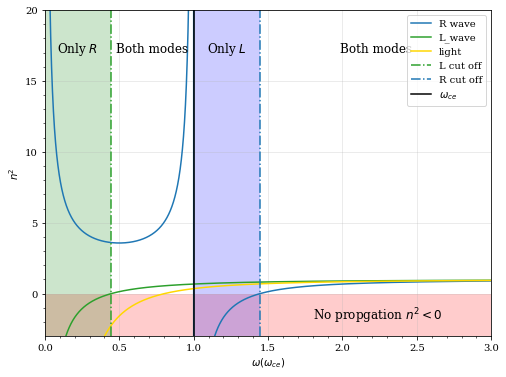

In [18]:
  
fig, ax = plt.subplots(figsize=(8,6))
s=5
# ax.set_title('F2')
ax.set_ylabel(r'$n^2$')
ax.set_xlabel('$\omega (\omega_{ce})$')
ax.plot(warray/wce_nom,nsqR,color="tab:blue",label=r'R wave')
ax.plot(warray/wce_nom,nsqL,color="tab:green",label=r'L_wave')
ax.plot(warray/wce_nom,nsqlight,color="gold",label=r'light')
ax.axvline(x=cutoff_l/wce_nom, color="tab:green", linestyle='-.',label=r'L cut off')
ax.axvline(x=cutoff_r/wce_nom, color="tab:blue", linestyle='-.',label=r'R cut off')
ax.axvline(x=1, color="black",label=r'$\omega_{ce}$')
ax.yaxis.get_ticklocs(minor=True)
ax.axhspan(-5, 0, alpha=0.2,facecolor='red')
ax.axvspan(0,cutoff_l/wce_nom, alpha=0.2,facecolor='green')
ax.axvspan(1,cutoff_r/wce_nom, alpha=0.2,facecolor='blue')
ax.minorticks_on()
# ax.set_yscale('log')
ax.text(1.8, -1.8,'No propgation $n^2 <0$', fontsize = 12)

ax.text((cutoff_l/wce_nom)/2, 17,'Only $R$', fontsize = 12, ha='center')
ax.text((cutoff_r/wce_nom+1)/2, 17,'Only $L$', fontsize = 12, ha='center')
ax.text((cutoff_l/wce_nom+1)/2, 17,'Both modes', fontsize = 12, ha='center')
ax.text((cutoff_r/wce_nom+3)/2, 17,'Both modes', fontsize = 12, ha='center')
# ax.set_xscale('log')

# ax.tick_params(labelright=True,right=True)
ax.legend()
ax.set_ylim([-3,20])
ax.set_xlim([0,3])
# ax.axvline(x=k_stop, color='r', linestyle='-.')
# ax.set_xlim([0,100000])
# ax.set_ylim(-1000,1000)
ax.grid(alpha=.3)
plt.show()

[Return to top](#top-bullet) 

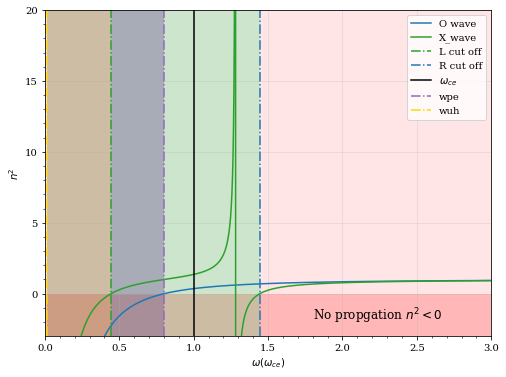

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
s=5
# ax.set_title('F2')
ax.set_ylabel(r'$n^2$')
ax.set_xlabel('$\omega (\omega_{ce})$')
ax.plot(warray/wce_nom,nsqO,color="tab:blue",label=r'O wave')
ax.plot(warray/wce_nom,nsqX,color="tab:green",label=r'X_wave')
# ax.plot(warray/wce_nom,nsqlight,color="gold",label=r'light')
ax.axvline(x=cutoff_l/wce_nom, color="tab:green", linestyle='-.',label=r'L cut off')
ax.axvline(x=cutoff_r/wce_nom, color="tab:blue", linestyle='-.',label=r'R cut off')
ax.axvline(x=1, color="black",label=r'$\omega_{ce}$')
ax.axvline(x=wpe_nom/wce_nom, color="tab:purple", linestyle='-.',label=r'wpe')
ax.axvline(x=wlh/wce_nom, color="gold", linestyle='-.',label=r'wuh')
ax.yaxis.get_ticklocs(minor=True)
ax.axhspan(-5, 0, alpha=0.2,facecolor='red')
# ax.axvspan(0,cutoff_l/wce_nom, alpha=0.2,facecolor='green')
# ax.axvspan(1,cutoff_r/wce_nom, alpha=0.2,facecolor='blue')
ax.minorticks_on()
# ax.set_yscale('log')
ax.text(1.8, -1.8,'No propgation $n^2 <0$', fontsize = 12)

ax.axvspan(0,cutoff_l/wce_nom, alpha=0.1,facecolor='red')
ax.axvspan(cutoff_l/wce_nom,wpe_nom/wce_nom, alpha=0.2,facecolor='blue')
ax.axvspan(wpe_nom/wce_nom,wlh/wce_nom, alpha=0.1,facecolor='red')
ax.axvspan(wlh/wce_nom,cutoff_r/wce_nom, alpha=0.2,facecolor='green')
ax.axvspan(cutoff_r/wce_nom,3, alpha=0.1,facecolor='red')
# ax.tick_params(labelright=True,right=True)
ax.legend()
ax.set_ylim([-3,20])
ax.set_xlim([0,3])
# ax.axvline(x=k_stop, color='r', linestyle='-.')
# ax.set_xlim([0,100000])
# ax.set_ylim(-1000,1000)
ax.grid(alpha=.3)
plt.show()

[Return to top](#top-bullet) 

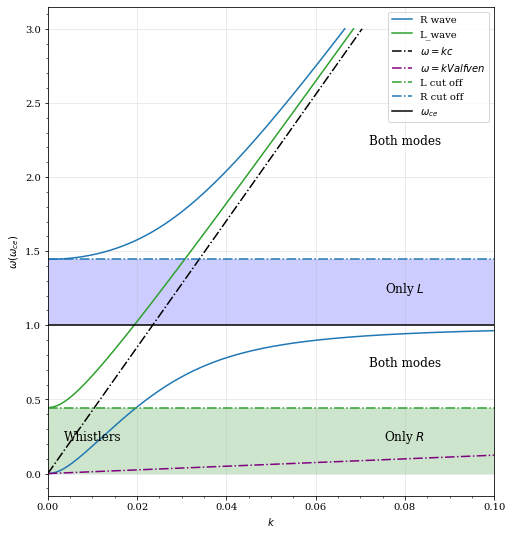

In [20]:

fig, ax = plt.subplots(figsize=(8,9))
s=5
# ax.set_title('F2')
ax.set_xlabel(r'$k$')
ax.set_ylabel('$\omega (\omega_{ce})$')
ax.plot(kR,warray/wce_nom,color="tab:blue",label=r'R wave')
ax.plot(kL,warray/wce_nom,color="tab:green",label=r'L_wave')
ax.plot(kwc,warray/wce_nom,color="black",label=r'$\omega=kc$', linestyle='-.')
ax.plot(kwalfven,warray/wce_nom,color="purple",label=r'$\omega=kValfven$', linestyle='-.')
# ax.plot(klight,warray/wce_nom,color="gold",label=r'light')
ax.axhline(y=cutoff_l/wce_nom, color="tab:green", linestyle='-.',label=r'L cut off')
ax.axhline(y=cutoff_r/wce_nom, color="tab:blue", linestyle='-.',label=r'R cut off')
ax.axhline(y=1, color="black",label=r'$\omega_{ce}$')

ax.axhspan(0,cutoff_l/wce_nom, alpha=0.2,facecolor='green')
ax.axhspan(1,cutoff_r/wce_nom, alpha=0.2,facecolor='blue')

ax.text(0.08,(cutoff_l/wce_nom)/2,'Only $R$', fontsize = 12, ha='center')
ax.text(0.01,(cutoff_l/wce_nom)/2,'Whistlers', fontsize = 12, ha='center')
ax.text(0.08,(cutoff_r/wce_nom+1)/2,'Only $L$', fontsize = 12, ha='center')
ax.text(0.08,(cutoff_l/wce_nom+1)/2,'Both modes', fontsize = 12, ha='center')
ax.text(0.08,(cutoff_r/wce_nom+3)/2,'Both modes', fontsize = 12, ha='center')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
# ax.set_yscale('log')

# ax.set_xscale('log')

# ax.tick_params(labelright=True,right=True)
ax.legend()
# ax.set_ylim([0,3])
ax.set_xlim([0,0.1])
# ax.axvline(x=k_stop, color='r', linestyle='-.')
# ax.set_xlim([0,100000])
# ax.set_ylim(-1000,1000)
ax.grid(alpha=.3)
plt.show()

[Return to top](#top-bullet) 

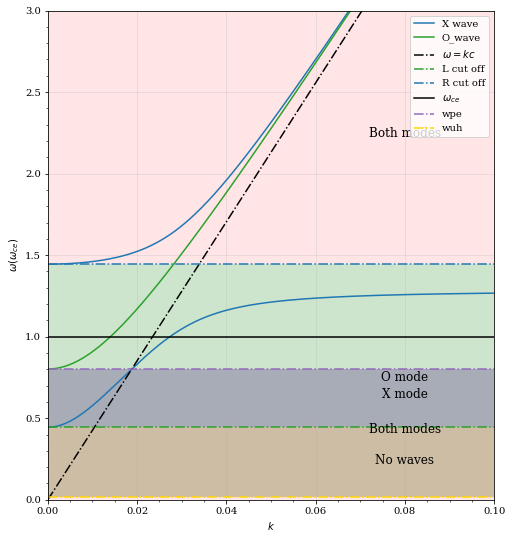

In [21]:
fig, ax = plt.subplots(figsize=(8,9))
s=5
# ax.set_title('F2')
ax.set_xlabel(r'$k$')
ax.set_ylabel('$\omega (\omega_{ce})$')
ax.plot(kX,warray/wce_nom,color="tab:blue",label=r'X wave')
ax.plot(kO,warray/wce_nom,color="tab:green",label=r'O_wave')
ax.plot(kwc,warray/wce_nom,color="black",label=r'$\omega=kc$', linestyle='-.')
ax.axhline(y=cutoff_l/wce_nom, color="tab:green", linestyle='-.',label=r'L cut off')
ax.axhline(y=cutoff_r/wce_nom, color="tab:blue", linestyle='-.',label=r'R cut off')
ax.axhline(y=1, color="black",label=r'$\omega_{ce}$')
ax.axhline(y=wpe_nom/wce_nom, color="tab:purple", linestyle='-.',label=r'wpe')
ax.axhline(y=wlh/wce_nom, color="gold", linestyle='-.',label=r'wuh')

ax.axhspan(0,cutoff_l/wce_nom, alpha=0.1,facecolor='red')
ax.axhspan(cutoff_l/wce_nom,wpe_nom/wce_nom, alpha=0.2,facecolor='blue')
ax.axhspan(wpe_nom/wce_nom,wlh/wce_nom, alpha=0.1,facecolor='red')
ax.axhspan(wlh/wce_nom,cutoff_r/wce_nom, alpha=0.2,facecolor='green')
ax.axhspan(cutoff_r/wce_nom,3, alpha=0.1,facecolor='red')

ax.text(0.08,(cutoff_l/wce_nom)/2,'No waves', fontsize = 12, ha='center')
ax.text(0.08,(wpe_nom/wce_nom+cutoff_l/wce_nom)/2,'X mode', fontsize = 12, ha='center')
ax.text(0.08,(wlh/wce_nom+wpe_nom/wce_nom)/2,'Both modes', fontsize = 12, ha='center')
ax.text(0.08,(wlh/wce_nom+cutoff_r/wce_nom)/2,'O mode', fontsize = 12, ha='center')
ax.text(0.08,(cutoff_r/wce_nom+3)/2,'Both modes', fontsize = 12, ha='center')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
# ax.set_yscale('log')

# ax.set_xscale('log')

# ax.tick_params(labelright=True,right=True)
ax.legend()
ax.set_ylim([0,3])
ax.set_xlim([0,0.1])
# ax.axvline(x=k_stop, color='r', linestyle='-.')
# ax.set_xlim([0,100000])
# ax.set_ylim(-1000,1000)
ax.grid(alpha=.3)
plt.show()

[Return to top](#top-bullet) 

### 25. WPIT.WaveProperties_mod.refr_index_parallel_EMIC <a class="anchor" id="refr_index_parallel_EMIC-bullet"></a>

**Calculate the refractive index of parallel propagating EMIC waves**

***

**<font color='blue'>Description</font>**

$$ \mu^2= 1-\sum_s \frac{\omega_{ps}^2}{\omega(\omega-\omega_{cs})} $$ 


***

**<font color='red'>Inputs</font>**



**wmega_wave**: wave frequency in rad/s

**wpe**: electron plasma frequency in rad/s

**wce**: electron cyclotron frequency in rad/s

**wpH**: H+ plasma frequency in rad /s

**wcH**: H+ cyclotron frequency in rad/s

**wpO**: O+ plasma frequency in rad /s

**wcO**: O+ cyclotron frequency in rad/s

**wpHe**: He+ plasma frequency in rad /s

**wcHe**: He+ cyclotron frequency in rad/s

***

**<font color='green'>Outputs</font>**

**R_tmp**: refractive index

***

[Return to top](#top-bullet) 